### Student Information
Name: NGUYEN VAN SA (阮文沙)

Student ID: F114156136

GitHub ID: Ethannguye

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

1. Setup and Load Data

In [20]:
# test code for environment setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math 
import PAMI
import umap
import helpers.data_mining_helpers as dmh

[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

/Users/admin/Documents/DM2025Labs/DM2025-Lab1-Exercise/.venv/bin/python
3.11.0 (v3.11.0:deaf509e8f, Oct 24 2022, 14:43:23) [Clang 13.0.0 (clang-1300.0.29.30)]


In [23]:
# Load the dataset
df = pd.read_csv('/Users/admin/Documents/DM2025Labs/DM2025-Lab1-Exercise/newdataset/Reddit-stock-sentiment.csv')
df.head()

type             datetime  post_id         subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3     post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4  comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   
3                              Who knows more? $VMAR             emiljenfn   
4  The Trump administration is begging Xi Jinping...          Just-Big6411   

                                                 url  upvotes  downvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0        NaN   
1               https://i.redd.it/7tl6puv9waue1.jpeg      -15        NaN   
2  https://apnews.com/article/trump-truth-social-...        1        NaN   
3  https://www.reddit.com/r/stockstobuytoday/comm...       30        0.0   
4  https://edition.cnn.com/2025/04/10/politics/tr...        1        NaN   

   upvote_ratio                                               text  \
0           NaN                                   Calls on retards   
1           NaN  Stunt as in like why did they even make a big ...   
2           NaN                  Seeing lots of red in the ticker.   
3          0.98  Vision Marine Technologies Inc. is rewriting t...   
4           NaN                           He didn’t say thank you.   

   subjectivity  polarity  sentiment  \
0      1.000000 -0.900000       -1.0   
1      0.177778  0.083333        1.0   
2      0.000000  0.000000        0.0   
3      0.646970  0.216383        1.0   
4      0.000000  0.000000        0.0   

                                            entities  label  
0                                                 []   -1.0  
1              ['Stunt', 'company', 'deal', 'place']    0.0  
2                                         ['ticker']    0.0  
3  ['watercraft', 'skill', 'power', ']', 'feat', ...    1.0  
4                                                 []   -1.0

2. Data Exploration

In [24]:
#Check the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   downvotes     64 non-null     float64
 9   upvote_ratio  64 non-null     float64
 10  text          847 non-null    object 
 11  subjectivity  847 non-null    float64
 12  polarity      847 non-null    float64
 13  sentiment     847 non-null    float64
 14  entities      847 non-null    object 
 15  label         847 non-null    float64
dtypes: float64(6), int64(1), object(9)
memory usage: 106.0+ KB


In [25]:
# Simplify dataset - keep necessary columns
df = df[['text','label']]
df

text  label
0                                     Calls on retards   -1.0
1    Stunt as in like why did they even make a big ...    0.0
2                    Seeing lots of red in the ticker.    0.0
3    Vision Marine Technologies Inc. is rewriting t...    1.0
4                             He didn’t say thank you.   -1.0
..                                                 ...    ...
842        Invest now it is going to shoot up tomorrow    1.0
843                             Where can I read this?    0.0
844  Upgrades, Downgrades\n\n [Stock Analyst Recomm...    0.0
845  i sold my puts so i expect cheeto to declare w...   -1.0
846                       ![img](emote|t5_2th52|31224)    0.0

[847 rows x 2 columns]

In [26]:
#Add label_name
df['label_name'] = df['label'].map({-1.0: 'negative', 0.0: 'neutral', 1.0: 'positive'})
df

text  label label_name
0                                     Calls on retards   -1.0   negative
1    Stunt as in like why did they even make a big ...    0.0    neutral
2                    Seeing lots of red in the ticker.    0.0    neutral
3    Vision Marine Technologies Inc. is rewriting t...    1.0   positive
4                             He didn’t say thank you.   -1.0   negative
..                                                 ...    ...        ...
842        Invest now it is going to shoot up tomorrow    1.0   positive
843                             Where can I read this?    0.0    neutral
844  Upgrades, Downgrades\n\n [Stock Analyst Recomm...    0.0    neutral
845  i sold my puts so i expect cheeto to declare w...   -1.0   negative
846                       ![img](emote|t5_2th52|31224)    0.0    neutral

[847 rows x 3 columns]

In [27]:
# excercise 1: Print the first 3 examples of the 'text' column, each on a new line
for i in range(3):
    print(f"example {i+1}")
    print("\n".join(df['text'].iloc[i].split("\n")))

example 1
Calls on retards
example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
example 3
Seeing lots of red in the ticker.


In [28]:
# a simple query
df[:10][["text","label_name"]]

text label_name
0                                   Calls on retards   negative
1  Stunt as in like why did they even make a big ...    neutral
2                  Seeing lots of red in the ticker.    neutral
3  Vision Marine Technologies Inc. is rewriting t...   positive
4                           He didn’t say thank you.   negative
5  Hoping to ejaculate in wet warm puss tonight, ...    neutral
6  Trump will respond to china increasing their t...   negative
7  Confirmed not a trap. Its been like this for p...    neutral
8  Am I the only one seeing the cup & handle brea...   positive
9  HLGN is $10. Hurry and catch it now before it ...   positive

In [29]:
#query the last 10 records
df[-10:]

text  label label_name
837                 Finance media lying \n\n*Surprise*   -1.0   negative
838                                        I am all in    0.0    neutral
839                               The Art of the Deal…    0.0    neutral
840                                             Lol fr    0.0    neutral
841  So countries “begging to stop the tariffs” and...    1.0   positive
842        Invest now it is going to shoot up tomorrow    1.0   positive
843                             Where can I read this?    0.0    neutral
844  Upgrades, Downgrades\n\n [Stock Analyst Recomm...    0.0    neutral
845  i sold my puts so i expect cheeto to declare w...   -1.0   negative
846                       ![img](emote|t5_2th52|31224)    0.0    neutral

In [30]:
# using loc (by label)
df.loc[:10, 'text']

0                                      Calls on retards
1     Stunt as in like why did they even make a big ...
2                     Seeing lots of red in the ticker.
3     Vision Marine Technologies Inc. is rewriting t...
4                              He didn’t say thank you.
5     Hoping to ejaculate in wet warm puss tonight, ...
6     Trump will respond to china increasing their t...
7     Confirmed not a trap. Its been like this for p...
8     Am I the only one seeing the cup & handle brea...
9     HLGN is $10. Hurry and catch it now before it ...
10         It's a copy/paste from a Bloomberg terminal.
Name: text, dtype: object

In [31]:
# using iloc (by position)
df.iloc[:10, 0]

0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4                             He didn’t say thank you.
5    Hoping to ejaculate in wet warm puss tonight, ...
6    Trump will respond to china increasing their t...
7    Confirmed not a trap. Its been like this for p...
8    Am I the only one seeing the cup & handle brea...
9    HLGN is $10. Hurry and catch it now before it ...
Name: text, dtype: object

In [32]:
#using boolean indexing - excercise 2
df[df["label"] == -1][:10]

text  label label_name
0                                    Calls on retards   -1.0   negative
4                            He didn’t say thank you.   -1.0   negative
6   Trump will respond to china increasing their t...   -1.0   negative
12  Honestly let the economy burn, maybe people wi...   -1.0   negative
16                                       Jesus Christ   -1.0   negative
17  Exactly this. Trump will blink first because, ...   -1.0   negative
18                                     Trump and dump   -1.0   negative
19  I think we are past the numbers. Just assume f...   -1.0   negative
20                Nooo dont go down its smug bull day   -1.0   negative
23  I feel like these HFs took the word "retard" t...   -1.0   negative

In [33]:
#excercise : How many positive, negative and neutral posts are in the dataset?
df['label_name'].value_counts()

label_name
neutral     423
negative    315
positive    109
Name: count, dtype: int64

In [34]:
#excercise 3: Select every 10th negative post and display the first 5 of them.
df[df['label_name']=='negative'][::10][0:5]

text  label label_name
0                                     Calls on retards   -1.0   negative
25   You see, Target, pissing off a good chunk of y...   -1.0   negative
62                                     Comedy gold :))   -1.0   negative
95   Japan and the UK are the two largest holders o...   -1.0   negative
125  Trump is like the annoying little brother (wit...   -1.0   negative

3.  Data Mining using Pandas

a. Missing Values

In [35]:
# check missing values
df.isnull()

text  label  label_name
0    False  False       False
1    False  False       False
2    False  False       False
3    False  False       False
4    False  False       False
..     ...    ...         ...
842  False  False       False
843  False  False       False
844  False  False       False
845  False  False       False
846  False  False       False

[847 rows x 3 columns]

In [36]:

# check missing values with helper function
df.isnull().apply(lambda x: dmh.check_missing_values(df))

text                               label  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                           label_name  
0  The amoung of missing records is:   
1                                   0

In [37]:
#Calculate the missing values in every record instead of every column
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [38]:
# Create a dummy pandas Series
dummy_series = pd.Series(["dummy_record", 1], index=["text", "label"])
dummy_series

text     dummy_record
label               1
dtype: object

In [39]:
dummy_series.to_frame().T

text label
0  dummy_record     1

In [40]:
result_with_series = pd.concat([df, dummy_series.to_frame().T], ignore_index=True)

In [41]:
# check if the records was commited into result
len(result_with_series)

848

In [42]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

text                               label  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                           label_name  
0  The amoung of missing records is:   
1                                   1

In [43]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'label': 1
               }]

In [44]:
df = pd.concat([df, pd.DataFrame(dummy_dict)], ignore_index=True)

In [45]:
len(df)

848

In [46]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

text                               label  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                           label_name  
0  The amoung of missing records is:   
1                                   1

In [47]:
df.dropna(inplace=True)

In [48]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

text                               label  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                           label_name  
0  The amoung of missing records is:   
1                                   0

In [49]:
len(df)

847

b. Dealing with Duplicate Data

In [50]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844     True
845    False
846    False
Length: 847, dtype: bool

In [51]:
sum(df.duplicated())

23

In [52]:
sum(df.duplicated('text'))

23

In [53]:
df.drop_duplicates(keep=False, inplace=True)

In [54]:
sum(df.duplicated())

0

In [55]:
sum(df.duplicated('text'))

0

In [56]:
len(df)

813

4. Data Preprocessing


a. Sampling

In [57]:
#random state
df_sample = df.sample(n=400)
len(df_sample)

400

In [58]:
df_sample[0:4]

text  label label_name
784                                   I call bullshit!    0.0    neutral
486  On April 9, China Hongqiao Group Limited (0137...    0.0    neutral
164  The bond market is also begging for that call....    0.0    neutral
590  *That didn't happen.*\n\n*And if it did, it wa...    0.0    neutral

One of the most changes from the `df` dataframe to the `df_sample` dataframe is the number of records (df = 813, df_sample = 500).
Another change is that the records in `df_sample` are randomly selected from `df`
Therefore, the order of records in `df_sample` is different from `df`

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 0 to 846
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   text        813 non-null    object 
 1   label       813 non-null    float64
 2   label_name  813 non-null    object 
dtypes: float64(1), object(2)
memory usage: 25.4+ KB


label_name
neutral     391
negative    315
positive    107
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment Labels '}, xlabel='label_name'>

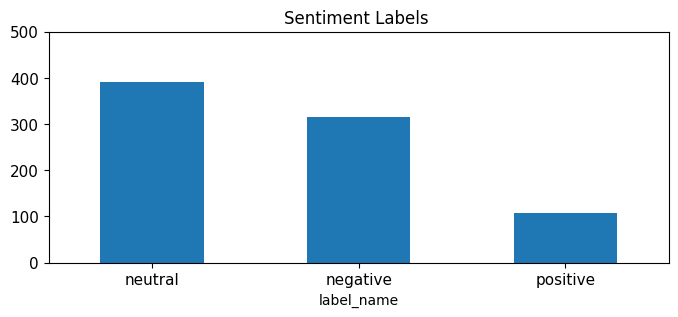

In [61]:
print(df.label_name.value_counts())

# plot barchart for df
df.label_name.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment Labels ',
                                    ylim = [0, 500],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

label_name
neutral     200
negative    143
positive     57
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment Labels '}, xlabel='label_name'>

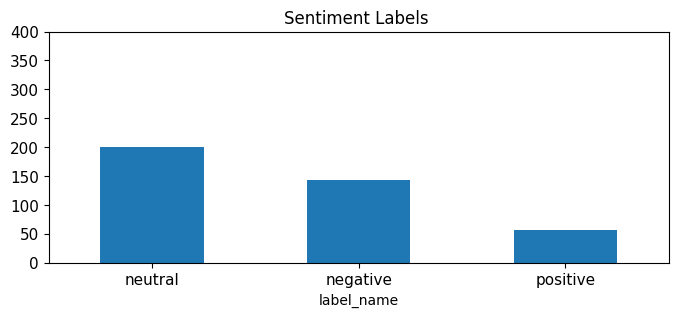

In [62]:
print(df_sample.label_name.value_counts())

# plot barchart for df
df_sample.label_name.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment Labels ',
                                    ylim = [0, 400],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

In [63]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Axes: title={'center': 'Sentiment Labels '}, xlabel='label_name'>

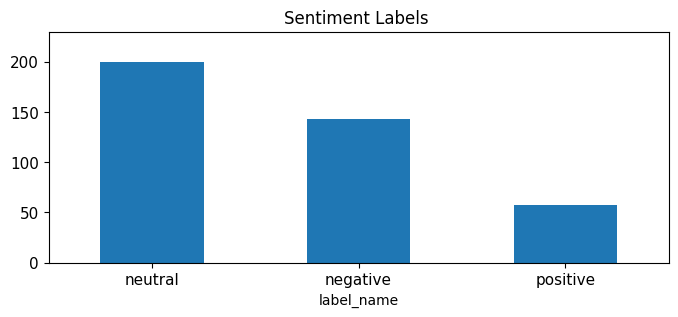

In [64]:
#excercise 7:
df_sample.label_name.value_counts().plot(kind = 'bar',
                                           title = 'Sentiment Labels ',
                                           ylim = [0, df_sample.label_name.value_counts().max()+30], 
                                           rot = 0, fontsize = 11, figsize = (8,3))

<Axes: title={'center': 'Sentiment Labels '}>

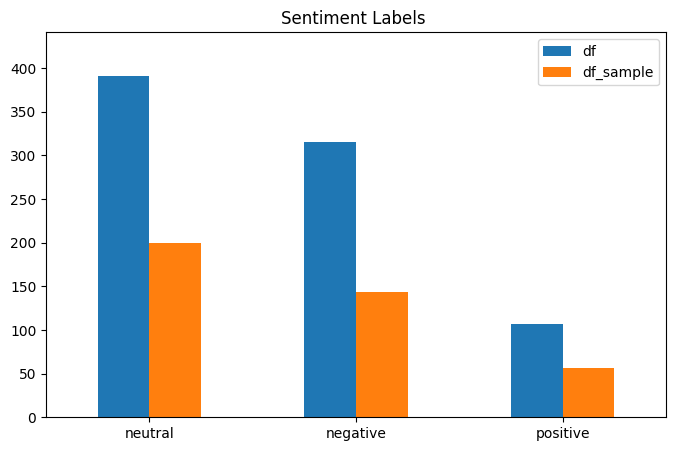

In [65]:
#excercise 8:
df_plot = pd.DataFrame({'df': df['label_name'].value_counts(), 
                   'df_sample': df_sample["label_name"].value_counts()})
df_plot.plot(kind='bar', 
        figsize=(8,5), 
        rot=0, fontsize=10, 
        ylim=[0, df_plot.values.max()+50], 
        title='Sentiment Labels ',
        xlabel='')

b. Feature Creation

In [66]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/admin/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [67]:
 # takes a like a minute or two to process

df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))

In [68]:
df[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [69]:
df[0:4]

text  label label_name  \
0                                   Calls on retards   -1.0   negative   
1  Stunt as in like why did they even make a big ...    0.0    neutral   
2                  Seeing lots of red in the ticker.    0.0    neutral   
3  Vision Marine Technologies Inc. is rewriting t...    1.0   positive   

                                            unigrams  
0                               [Calls, on, retards]  
1  [Stunt, as, in, like, why, did, they, even, ma...  
2        [Seeing, lots, of, red, in, the, ticker, .]  
3  [Vision, Marine, Technologies, Inc., is, rewri...

In [70]:
list(df[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

c. Feature subset selection

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_count = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix
print(df_count[0])

  (np.int32(0), np.int32(689))	1
  (np.int32(0), np.int32(2682))	1
  (np.int32(0), np.int32(3220))	1


In [72]:
count_vect.get_feature_names_out()[2106]

'investor'

In [73]:
analyze = count_vect.build_analyzer()

In [74]:
#excercise 9:
analyze(df.text[0])

['calls', 'on', 'retards']

In [75]:
# We can check the shape of this matrix by:
df_count.shape

(813, 4313)

In [76]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [77]:
df_count[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [78]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [79]:
count_vect.get_feature_names_out()[18]

'116'

In [80]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [81]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

In [82]:
plot_z = df_count[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

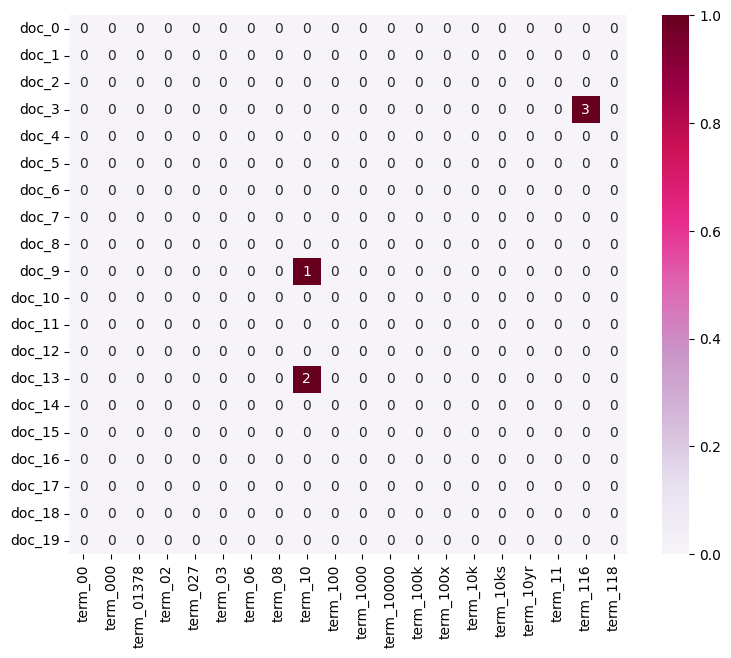

In [83]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

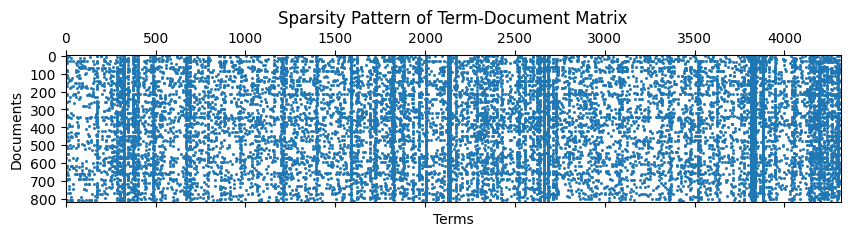

In [84]:
#Ex11: sparsity pattern
plt.figure(figsize=(10, 8))
plt.spy(df_count, markersize=1)
plt.title("Sparsity Pattern of Term-Document Matrix")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.show()

In [85]:
pip install wordcloud


[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


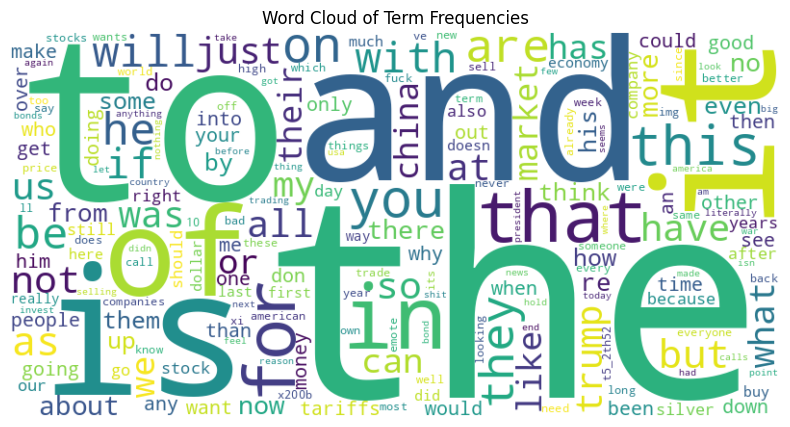

In [86]:
#EX11: Word Cloud visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

term_freq = np.asarray(df_count.sum(axis=0)).flatten()
terms = count_vect.get_feature_names_out()
freq_dict = dict(zip(terms, term_freq))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dict)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Term Frequencies")
plt.show()

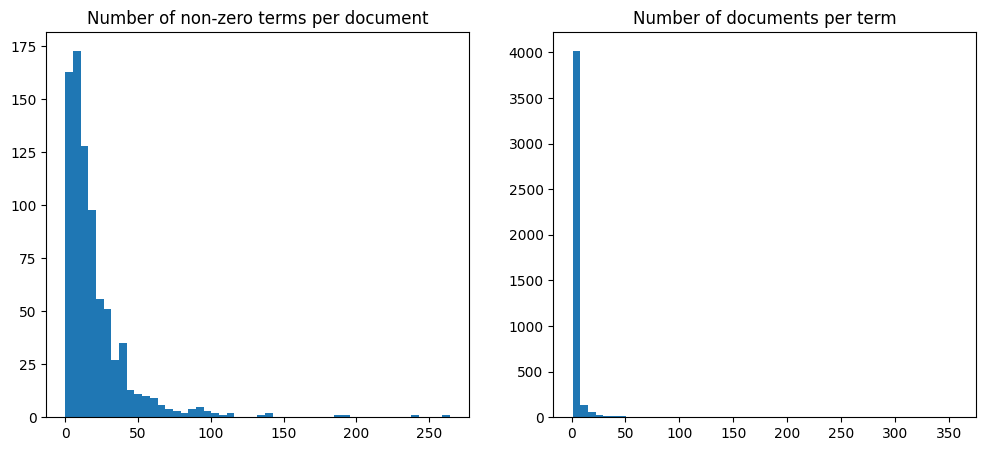

In [87]:
#Histogram / Density Plot
import numpy as np
import matplotlib.pyplot as plt

doc_nonzero = np.count_nonzero(df_count.toarray(), axis=1)
term_nonzero = np.count_nonzero(df_count.toarray(), axis=0)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(doc_nonzero, bins=50)
plt.title("Number of non-zero terms per document")

plt.subplot(1,2,2)
plt.hist(term_nonzero, bins=50)
plt.title("Number of documents per term")
plt.show()


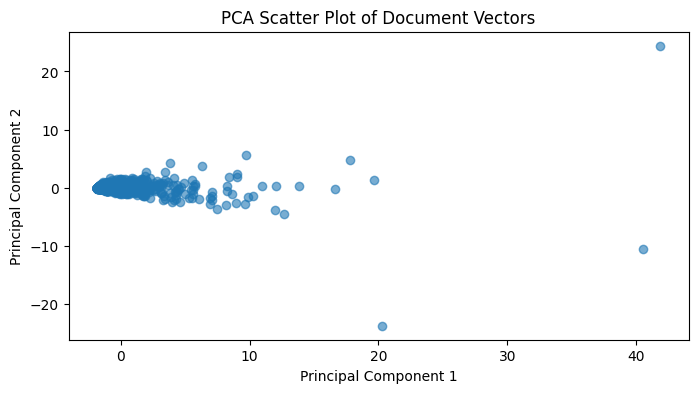

In [88]:
#Scatter Plot for PCA
from sklearn.decomposition import PCA

from sklearn.decomposition import PCA

df_dense = df_count.toarray()

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_dense)

plt.figure(figsize=(8,4))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.6)
plt.title("PCA Scatter Plot of Document Vectors")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


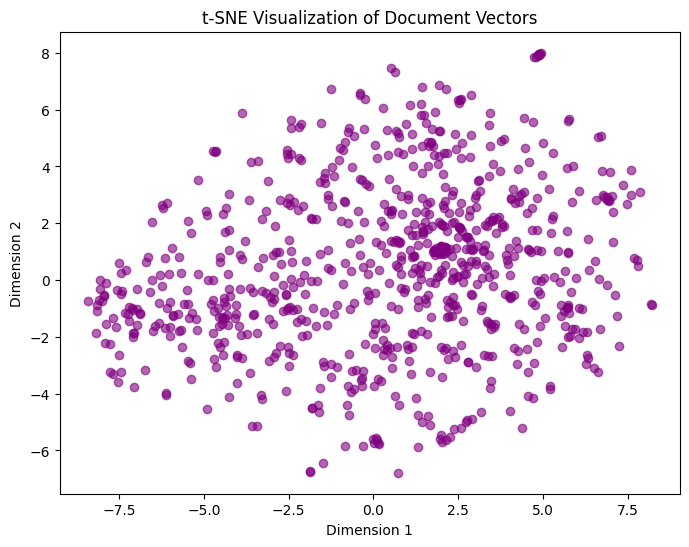

In [89]:
#t-SNE Scatter Plot
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
df_tsne = tsne.fit_transform(df_dense)

plt.figure(figsize=(8,6))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], alpha=0.6, color='purple')
plt.title("t-SNE Visualization of Document Vectors")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

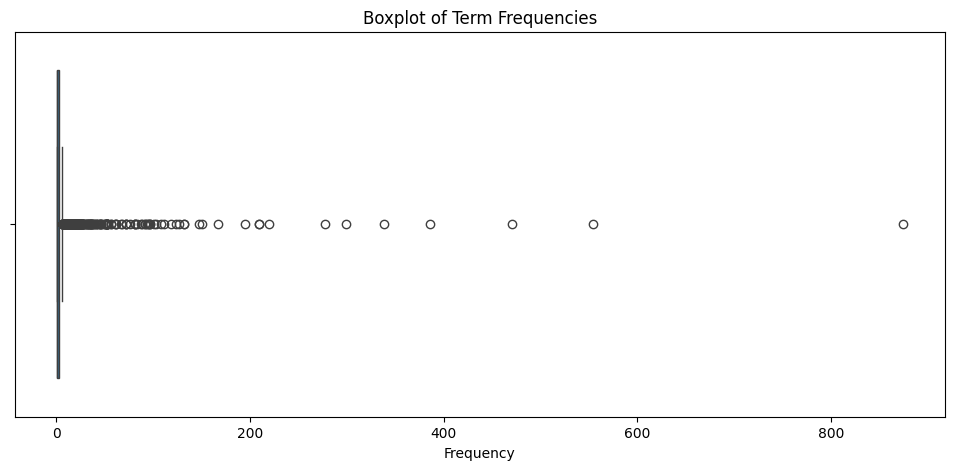

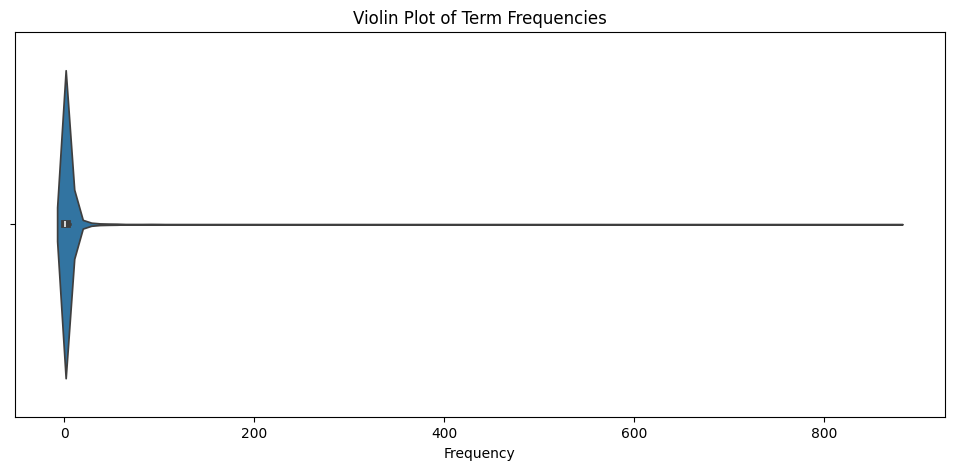

In [90]:
#Boxplot / Violin plot — Word frequency distribution
term_freq = np.asarray(df_count.sum(axis=0)).flatten()

plt.figure(figsize=(12,5))
sns.boxplot(x=term_freq)
plt.title("Boxplot of Term Frequencies")
plt.xlabel("Frequency")
plt.show()

plt.figure(figsize=(12,5))
sns.violinplot(x=term_freq)
plt.title("Violin Plot of Term Frequencies")
plt.xlabel("Frequency")
plt.show()


d. Attribute Transformation / Aggregation

In [91]:
term_frequencies = []
for j in range(0,df_count.shape[1]):
    term_frequencies.append(sum(df_count[:,j].toarray()))


In [92]:
term_frequencies = np.asarray(df_count.sum(axis=0))[0]

In [93]:
term_frequencies[0] #sum of first term: 00

np.int64(4)

/var/folders/02/wd76cl5111998yc2yd1_vcv00000gn/T/ipykernel_1875/3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


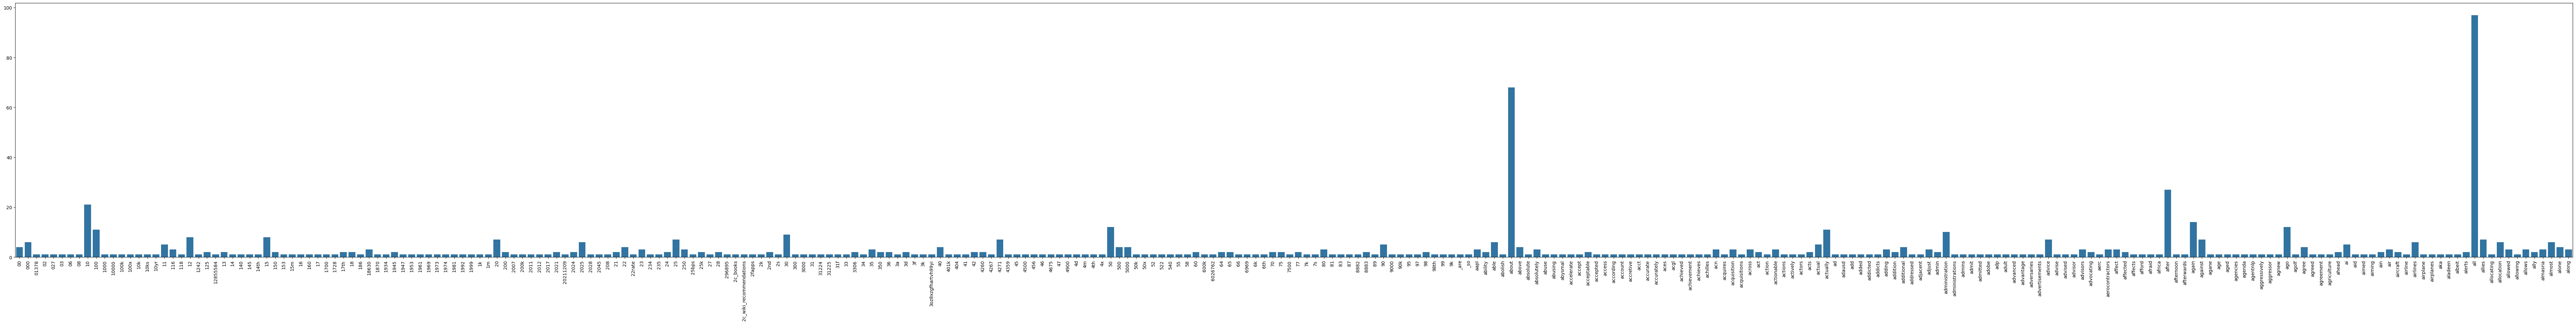

In [94]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [95]:
#excercise 12:
import plotly.graph_objects as go
terms = count_vect.get_feature_names_out()[:300]
frequencies = term_frequencies[:300]
fig = go.Figure(data=[go.Bar(x=terms, 
                             y=frequencies,
                             marker_color='indianred')])
fig.update_layout(title='Term Frequencies for First 300 Terms',
                  xaxis_title='Terms',
                  yaxis_title='Frequencies',
                  xaxis_tickangle=-45,
                  width=1000, height=500)
fig.show()

In [96]:
re_terms = count_vect.get_feature_names_out()[:50]
re_frequencies = term_frequencies[:50]
fig = go.Figure(data=[go.Bar(x=re_terms, 
                             y=re_frequencies,
                             marker_color='indianred')])
fig.update_layout(title='Term Frequencies for First 50 Terms',
                  xaxis_title='Terms',
                  yaxis_title='Frequencies',
                  xaxis_tickangle=-45,
                  width=1000, height=500)
fig.show()

In [97]:
#excercise 14:
sorted_terms = count_vect.get_feature_names_out()[np.argsort(term_frequencies)][::-1][:50]
sorted_frequencies = term_frequencies[np.argsort(term_frequencies)][::-1][:50]

fig = go.Figure(data=[go.Bar(x=sorted_terms, 
                             y=sorted_frequencies,
                             marker_color='indianred')])
fig.update_layout(title='Long Tail Distribution - Top 50 Terms by Frequency',
                  xaxis_title='Terms',
                  yaxis_title='Frequencies',
                  xaxis_tickangle=-45,
                  width=1000, height=500,
                  showlegend=True)
fig.show()

In [98]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/var/folders/02/wd76cl5111998yc2yd1_vcv00000gn/T/ipykernel_1875/2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



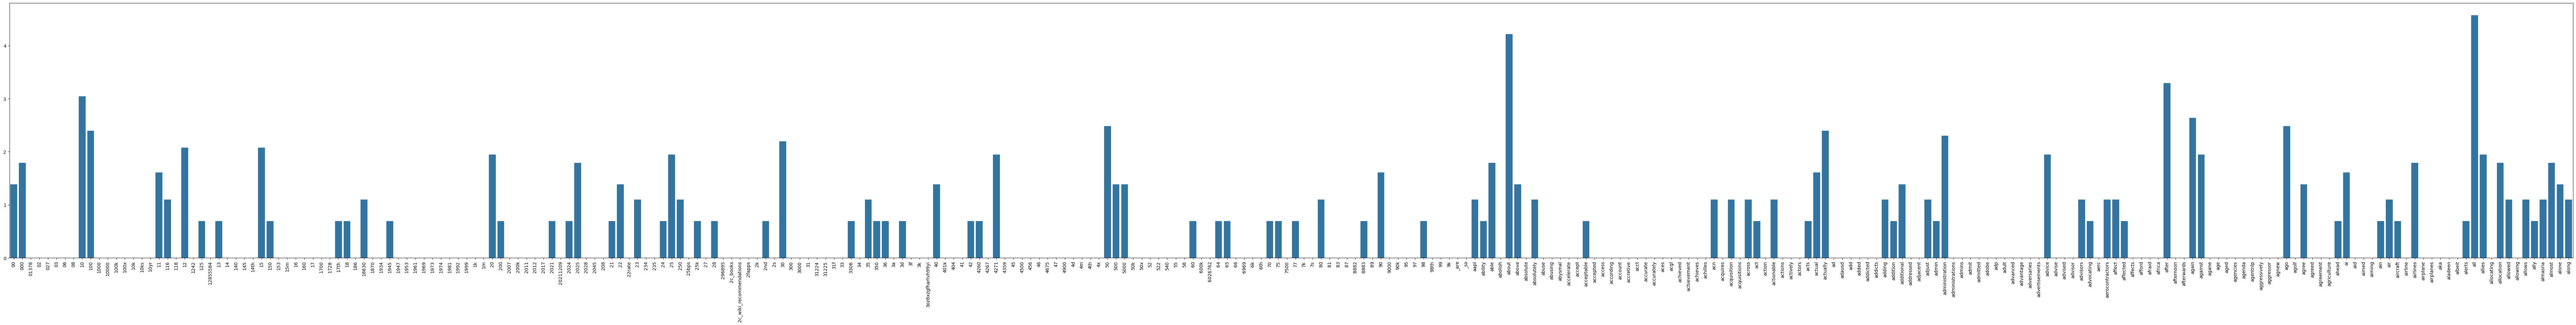

In [99]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

/var/folders/02/wd76cl5111998yc2yd1_vcv00000gn/T/ipykernel_1875/2040859867.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



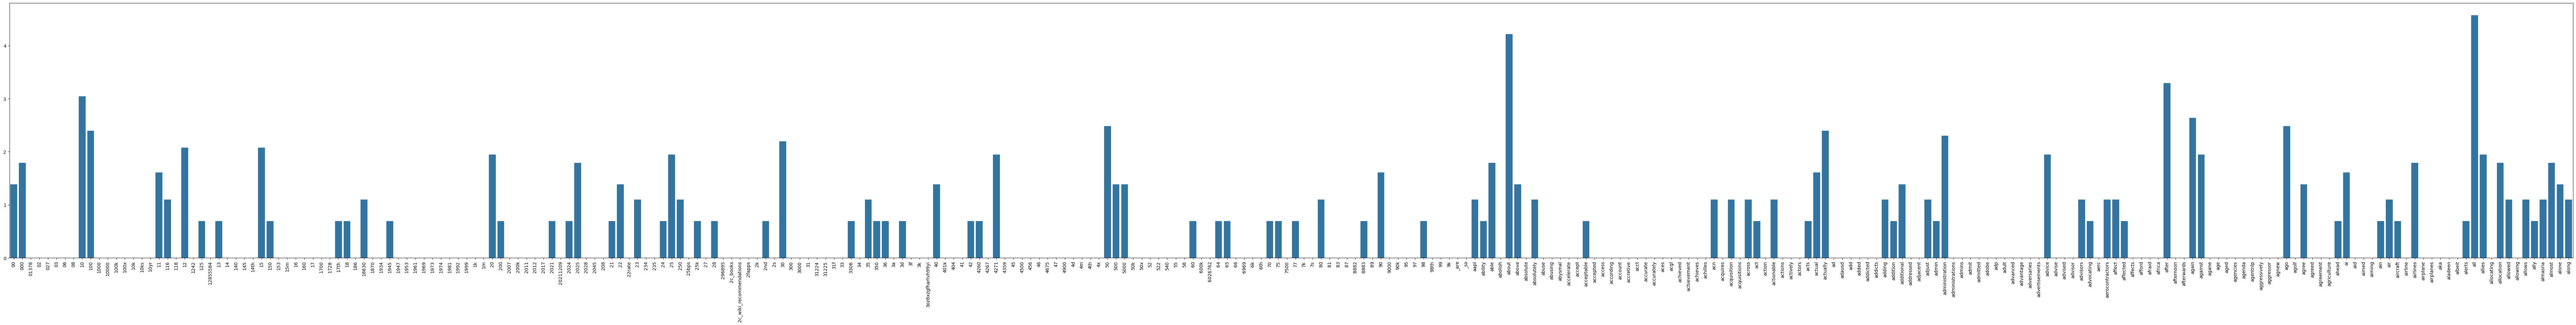

In [100]:
#excercise 15:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

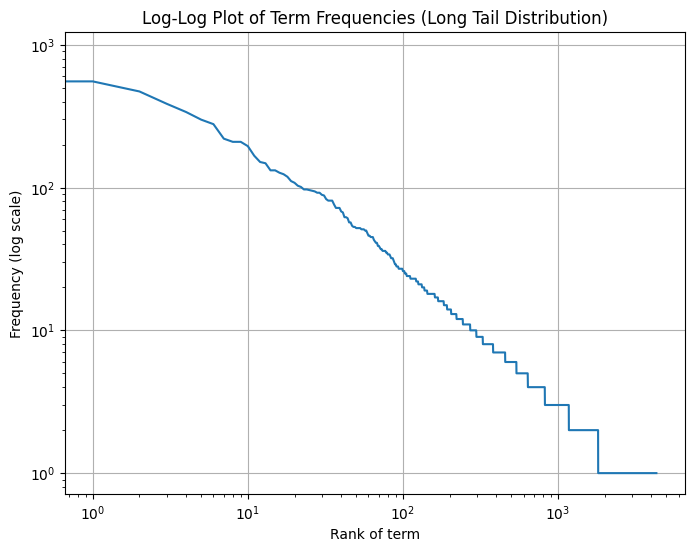

In [101]:
#long tail distribution
term_freq = np.asarray(df_count.sum(axis=0)).flatten()
term_freq_sorted = np.sort(term_freq)[::-1] 

plt.figure(figsize=(8,6))
plt.loglog(term_freq_sorted)
plt.title("Log-Log Plot of Term Frequencies (Long Tail Distribution)")
plt.xlabel("Rank of term")
plt.ylabel("Frequency (log scale)")
plt.grid(True)
plt.show()


# Phase 2

###  5.4.2 Finding frequent patterns

In [102]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
X = df.copy()

#Create separate DataFrames for each category
categories = X['label_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['label_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [103]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=0 #You can change it from 0 to 2
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category negative:


000  02  03  10  100  1000  10000  11  12  13  ...  years  yet  yields  \
0      0   0   0   0    0     0      0   0   0   0  ...      0    0       0   
1      0   0   0   0    0     0      0   0   0   0  ...      0    0       0   
2      0   0   0   0    0     0      0   0   0   0  ...      0    0       0   
3      0   0   0   0    0     0      0   0   0   0  ...      0    0       0   
4      0   0   0   0    0     0      0   0   0   0  ...      0    0       0   
..   ...  ..  ..  ..  ...   ...    ...  ..  ..  ..  ...    ...  ...     ...   
310    0   1   1   0    0     0      0   0   0   1  ...      0    0       0   
311    0   0   0   0    0     0      0   0   0   0  ...      1    0       0   
312    0   0   0   0    0     0      0   0   0   0  ...      0    0       0   
313    0   0   0   0    0     0      0   0   0   0  ...      0    0       0   
314    0   0   0   0    0     0      0   0   0   0  ...      0    0       0   

     yippee  yo  you  your  yourselves  youtube  zero  
0         0   0    0     0           0        0     0  
1         0   0    1     0           0        0     0  
2         0   0    0     0           0        0     0  
3         0   0    0     0           0        0     0  
4         0   0    0     0           0        0     0  
..      ...  ..  ...   ...         ...      ...   ...  
310       0   0    0     0           0        0     0  
311       0   0    0     0           0        0     0  
312       0   0    0     0           0        0     0  
313       0   0    0     0           0        0     0  
314       0   0    0     0           0        0     0  

[315 rows x 2192 columns]

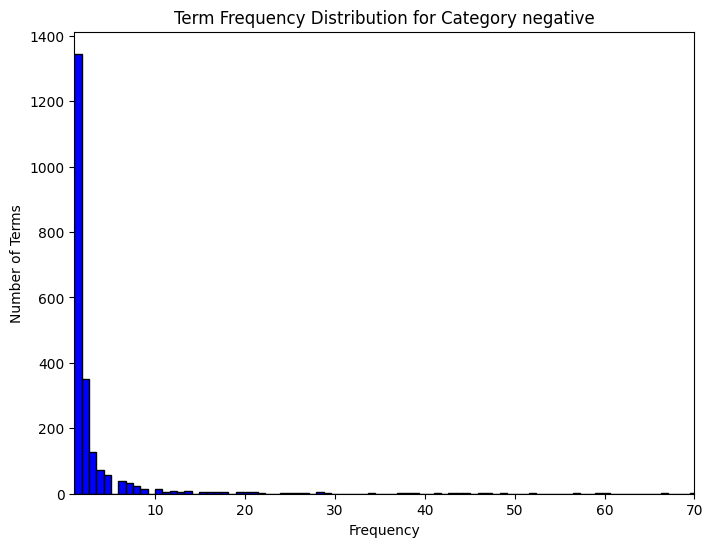

In [104]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 2
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(8, 6))
plt.hist(word_counts, bins=500, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 70)
plt.show()

In [105]:
category_number=0 #You can change it from 0 to 2
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: negative
Number of terms in top 5%: 109
Filtered terms: ['the', 'to', 'and', 'is', 'it', 'of', 'in', 'that', 'this', 'he', 'will', 'for', 'you', 'be', 'are', 'trump', 'they', 'us', 'on', 'as', 'so', 'not', 'all', 'have', 'china', 'but', 'has', 'just', 'we', 'what', 'if', 'with', 'was', 'at', 'his', 'can', 'their', 'about', 'or', 'even', 'people', 'like', 'no', 'there', 'my', 'market', 'more', 'them', 'think', 'him', 'now', 'going', 'money', 'one', 're', 'make', 'how', 'would', 'an', 'do', 'out', 'than', 'down', 'other', 'from', 'economy', 'up', 'tariffs', 'by', 'then', 'when', 'get', 'doing', 'over', 'some', 'who', 'don', 'been', 'trade', 'doesn', 'fuck', 'see', 'still', 'only', 'why', 'really', 'time', 'any', 'our', 'because', 'world', 'good', 'back', 'american', 'point', 'go', 'wants', 'xi', 'never', 'shit', 'much', 'most', 'your', 'me', 'literally', 'could', 'everyone', 'dollar', 'these']


In [106]:
sorted_counts #We can see the frequencies sorted in a descending order

array([409, 231, 193, ...,   1,   1,   1])

In [107]:
sorted_indices #This are the indices corresponding to the words after being sorted in a descending order

array([1918, 1956,  137, ...,   16,   49, 2190])

In [108]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0) #Here we can sum up the column corresponding to the top 5% words, we just specify which one first.

np.int64(409)

In [109]:
category_number=0 #You can change it from 0 to 2
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: negative
Number of terms in bottom 1%: 21
Filtered terms: ['youtube', '500', '1700', '60', '65', '6k', '6th', '77', '7s', '42', '401k', '98', '9k', '_are', 'aapl', '50', 'yourselves', '2k', '2s', '30', '3000']


In [110]:
sorted_counts #We can see the frequencies sorted in an ascending order

array([  1,   1,   1, ..., 193, 231, 409])

In [111]:
sorted_indices #This are the indices corresponding to the words after being sorted in an ascending order

array([2190,   49,   16, ...,  137, 1956, 1918])

In [112]:
category_number=0 #You can change it from 0 to 2

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category negative we filter the following words:
Bottom 1.0% words: 
youtube       1
500           1
1700          1
60            1
65            1
6k            1
6th           1
77            1
7s            1
42            1
401k          1
98            1
9k            1
_are          1
aapl          1
50            1
yourselves    1
2k            1
2s            1
30            1
3000          1
dtype: int64
Top 5.0% words: 
these         11
dollar        11
everyone      12
could         12
literally     12
            ... 
it           147
is           178
and          193
to           231
the          409
Length: 109, dtype: int64

For category neutral we filter the following words:
Bottom 1.0% words: 
zone        1
1k          1
1870        1
18630       1
186         1
18          1
17th        1
15m         1
150         1
145         1
140         1
14          1
yoyo        1
12855584    1
zgld        1
1m          1
1242        1
yea         1
01378       1
027     

000  02  03  10  100  1000  10000  11  12  13  ...  ya  yea  yeah  year  \
0      0   0   0   0    0     0      0   0   0   0  ...   0    0     0     0   
1      0   0   0   0    0     0      0   0   0   0  ...   0    0     0     0   
2      0   0   0   0    0     0      0   0   0   0  ...   0    0     0     0   
3      0   0   0   0    0     0      0   0   0   0  ...   0    0     0     0   
4      0   0   0   0    0     0      0   0   0   0  ...   0    0     0     0   
..   ...  ..  ..  ..  ...   ...    ...  ..  ..  ..  ...  ..  ...   ...   ...   
310    0   1   1   0    0     0      0   0   0   1  ...   0    0     0     0   
311    0   0   0   0    0     0      0   0   0   0  ...   0    0     0     0   
312    0   0   0   0    0     0      0   0   0   0  ...   0    0     0     0   
313    0   0   0   0    0     0      0   0   0   0  ...   0    0     0     0   
314    0   0   0   0    0     0      0   0   0   0  ...   0    0     0     0   

     years  yet  yields  yippee  yo  zero  
0        0    0       0       0   0     0  
1        0    0       0       0   0     0  
2        0    0       0       0   0     0  
3        0    0       0       0   0     0  
4        0    0       0       0   0     0  
..     ...  ...     ...     ...  ..   ...  
310      0    0       0       0   0     0  
311      1    0       0       0   0     0  
312      0    0       0       0   0     0  
313      0    0       0       0   0     0  
314      0    0       0       0   0     0  

[315 rows x 2062 columns]

In [113]:
# Exercise 16: Compare the filtering results across categories
print('''
 EXERCISE 16: FILTERED WORDS ANALYSIS

=== SIMILARITIES ===

Top 5% (Common Words):
  - All categories: "the", "to", "and", "is", "it" dominate
  - Article "the" most frequent: negative (409), neutral (352), positive (113)
  - Shared stock/trading vocabulary across sentiments

Bottom 1% (Rare Words):
  - All contain numbers/codes: "1k", "10k", "100k", "6k"
  - Stock tickers: "aapl", "zgld", "yahoo"
  - All appear exactly once (frequency = 1)

=== DIFFERENCES ===

Top 5% (Sentiment-Specific):
  - Negative: emotional terms "literally" (12), "everyone" (12)
  - Neutral: informational "news" (10), "high" (10), "long" (10)
  - Positive: action words "going" (9), "good" (14), "more" (15)
           specific mentions: "trump" (8), "technology" (12)

Bottom 1% (Noise):
  - Negative: 20 words (e.g., "youtube", "401k")
  - Neutral: 26 words - most diverse (e.g., "yall", "yea")
  - Positive: 11 words - least noise (e.g., "2021", "4x")''')



 EXERCISE 16: FILTERED WORDS ANALYSIS

=== SIMILARITIES ===

Top 5% (Common Words):
  - All categories: "the", "to", "and", "is", "it" dominate
  - Article "the" most frequent: negative (409), neutral (352), positive (113)
  - Shared stock/trading vocabulary across sentiments

Bottom 1% (Rare Words):
  - All contain numbers/codes: "1k", "10k", "100k", "6k"
  - Stock tickers: "aapl", "zgld", "yahoo"
  - All appear exactly once (frequency = 1)

=== DIFFERENCES ===

Top 5% (Sentiment-Specific):
  - Negative: emotional terms "literally" (12), "everyone" (12)
  - Neutral: informational "news" (10), "high" (10), "long" (10)
  - Positive: action words "going" (9), "good" (14), "more" (15)
           specific mentions: "trump" (8), "technology" (12)

Bottom 1% (Noise):
  - Negative: 20 words (e.g., "youtube", "401k")
  - Neutral: 26 words - most diverse (e.g., "yall", "yea")
  - Positive: 11 words - least noise (e.g., "2021", "4x")


In [114]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)
    print(f"Created: td_freq_db_{category_safe}.csv")


Created: td_freq_db_negative.csv
Created: td_freq_db_neutral.csv
Created: td_freq_db_positive.csv


Database size (total no of transactions) : 315
Number of items : 2062
Minimum Transaction Size : 1
Average Transaction Size : 11.82857142857143
Maximum Transaction Size : 139
Standard Deviation Transaction Size : 13.335088319874984
Variance in Transaction Sizes : 178.3909008189263
Sparsity : 0.9942635444090342


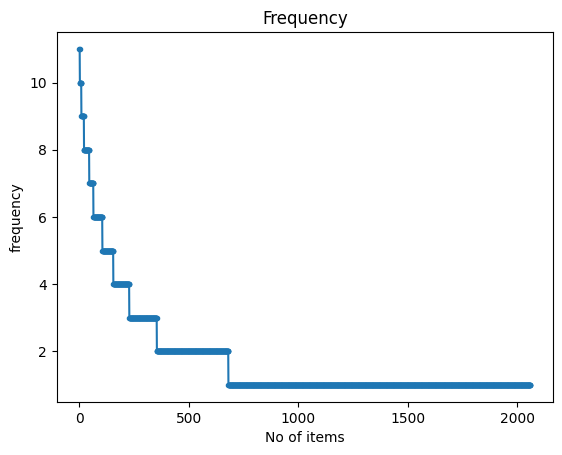

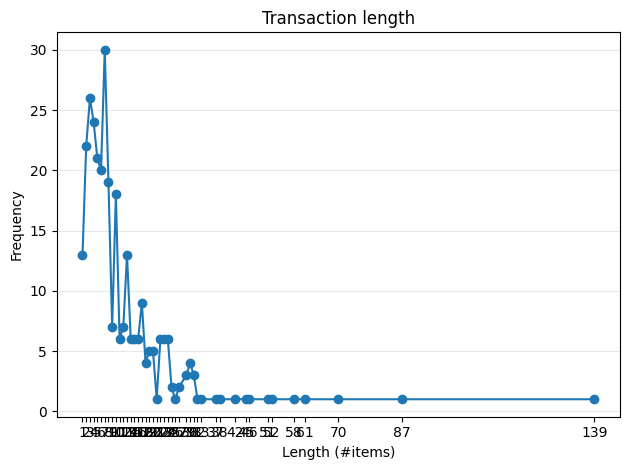

In [115]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_negative.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 385
Number of items : 2543
Minimum Transaction Size : 1
Average Transaction Size : 10.854545454545455
Maximum Transaction Size : 201
Standard Deviation Transaction Size : 18.715494972511834
Variance in Transaction Sizes : 351.1819128787879
Sparsity : 0.9957315983269581


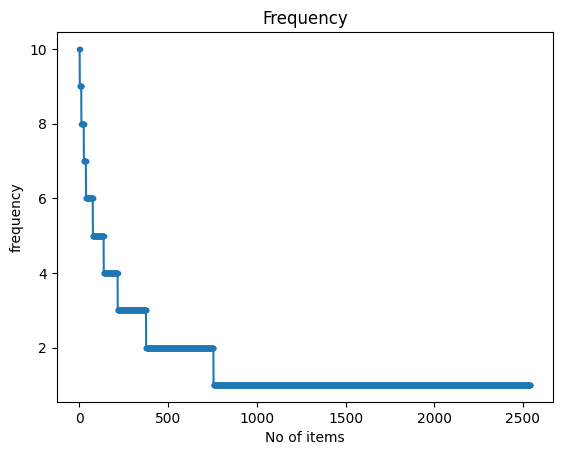

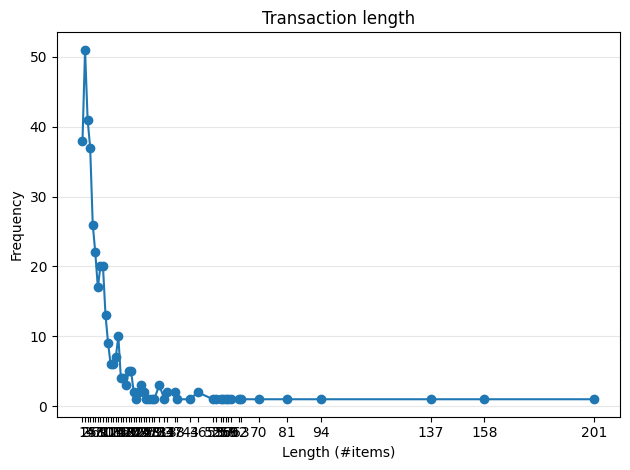

In [116]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_neutral.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 106
Number of items : 1099
Minimum Transaction Size : 1
Average Transaction Size : 14.471698113207546
Maximum Transaction Size : 92
Standard Deviation Transaction Size : 16.859691545316124
Variance in Transaction Sizes : 286.95633423180595
Sparsity : 0.9868319398423954


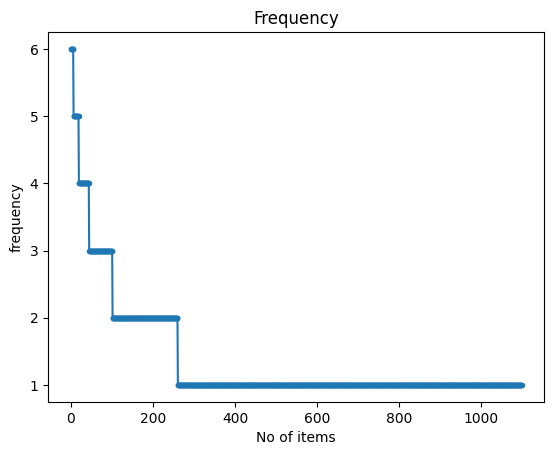

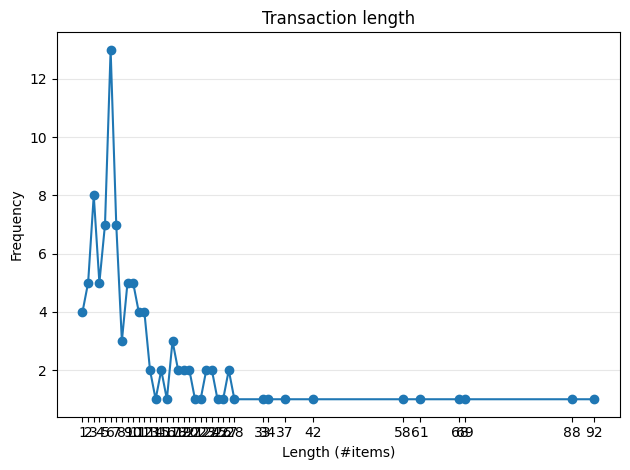

In [117]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_positive.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [118]:
#FPGROWTH
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6
obj1 = alg.FPGrowth(iFile='td_freq_db_negative.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_negative = obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_negative))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 105
Runtime: 0.004055976867675781


In [119]:
obj1.save('freq_patterns_negative_minSup9.txt') #save the patterns
frequentPatternsDF_negative

Patterns  Support
0        calls        6
1    companies        6
2          lot        6
3         next        6
4        first        6
..         ...      ...
100     should       10
101        bad       10
102      again       10
103    already       11
104      after       11

[105 rows x 2 columns]

In [120]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6
obj2 = alg.FPGrowth(iFile='td_freq_db_neutral.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_neutral = obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_neutral))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 105
Runtime: 0.004055976867675781


In [121]:
obj2.save('freq_patterns_neutral_minSup9.txt') #save the patterns
frequentPatternsDF_neutral

Patterns  Support
0        calls        6
1    companies        6
2          lot        6
3         next        6
4        first        6
..         ...      ...
100     should       10
101        bad       10
102      again       10
103    already       11
104      after       11

[105 rows x 2 columns]

In [122]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6
obj3 = alg.FPGrowth(iFile='td_freq_db_positive.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_positive= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_positive))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 7
Runtime: 0.0012619495391845703


In [123]:
obj3.save('freq_patterns_positive_minSup9.txt') #save the patterns
frequentPatternsDF_positive

Patterns  Support
0     into        6
1       us        6
2     them        6
3      out        6
4      see        6
5  economy        6
6      way        6

In [124]:
import pandas as pd

# Group together all dataframes with found patterns
dfs = [frequentPatternsDF_negative, frequentPatternsDF_neutral, frequentPatternsDF_positive]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}

# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)

# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
print(f"\nNumber of patterns discarded: {discarded_patterns_count}")

  Patterns  Support
0       us        6
1     them        6
2      out        6
3      see        6
4  economy        6

Number of patterns discarded: 212


In [125]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary
# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)
# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)
# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)
augmented_df

00  000  01378  02  027  03  06  08  10  100  ...  yup  zero  zgld  zone  \
0     0    0      0   0    0   0   0   0   0    0  ...    0     0     0     0   
1     0    0      0   0    0   0   0   0   0    0  ...    0     0     0     0   
2     0    0      0   0    0   0   0   0   0    0  ...    0     0     0     0   
3     0    0      0   0    0   0   0   0   0    0  ...    0     0     0     0   
4     0    0      0   0    0   0   0   0   0    0  ...    0     0     0     0   
..   ..  ...    ...  ..  ...  ..  ..  ..  ..  ...  ...  ...   ...   ...   ...   
841   0    0      0   0    0   0   0   0   0    0  ...    0     0     0     0   
842   0    0      0   0    0   0   0   0   0    0  ...    0     0     0     0   
843   0    0      0   0    0   0   0   0   0    0  ...    0     0     0     0   
845   0    0      0   0    0   0   0   0   0    0  ...    0     0     0     0   
846   0    0      0   0    0   0   0   0   0    0  ...    0     0     0     0   

     zsil  us  them  out  see  economy  
0       0   0     0    0    0        0  
1       0   0     0    0    0        0  
2       0   0     0    0    0        0  
3       0   0     0    0    0        0  
4       0   0     0    0    0        0  
..    ...  ..   ...  ...  ...      ...  
841     0   0     0    0    0        0  
842     0   0     0    0    0        0  
843     0   0     0    0    0        0  
845     0   0     0    0    0        0  
846     0   0     0    0    0        0  

[813 rows x 4318 columns]

## >>>  Exercise 17

In [126]:
# Answer Here
from PAMI.frequentPattern.topk import FAE
from PAMI.frequentPattern.maximal import MaxFPGrowth
#FAE TOP-K ALGORITHM
# Test with k = 250
print("\n--- Testing with k=250 ---")
k=250
obj_fae_250 = FAE.FAE(iFile='td_freq_db_negative.csv', k=k)
obj_fae_250.mine()
frequentPatternsDF_fae_250 = obj_fae_250.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_fae_250)))
print('Runtime: ' + str(obj_fae_250.getRuntime()))
obj_fae_250.save('fae_topk_negative_k250.txt')

# Test with k = 500
print("\n--- Testing with k=500 ---")
k=500
obj_fae_500 = FAE.FAE(iFile='td_freq_db_negative.csv', k=k)
obj_fae_500.mine()
frequentPatternsDF_fae_500 = obj_fae_500.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_fae_500)))
print('Runtime: ' + str(obj_fae_500.getRuntime()))
obj_fae_500.save('fae_topk_negative_k500.txt')


--- Testing with k=250 ---
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 250
Runtime: 0.018279075622558594

--- Testing with k=500 ---
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 500
Runtime: 0.14749693870544434


In [127]:
#MAXFPGROWTH ALGORITHM

# Test with minSup = 3
print("\n--- Testing with minSup=3 ---")
minSup=3
obj_maxfp_3 = MaxFPGrowth.MaxFPGrowth(iFile='td_freq_db_negative.csv', minSup=minSup)
obj_maxfp_3.mine()
frequentPatternsDF_maxfp_3 = obj_maxfp_3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_maxfp_3)))
print('Runtime: ' + str(obj_maxfp_3.getRuntime()))
obj_maxfp_3.save('maxfp_comp_negative_minSup3.txt')

# Test with minSup = 6
minSup=6
print("\n--- Testing with minSup=6 ---")
obj_maxfp_6 = MaxFPGrowth.MaxFPGrowth(iFile='td_freq_db_negative.csv', minSup=minSup)
obj_maxfp_6.mine()
frequentPatternsDF_maxfp_6 = obj_maxfp_6.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_maxfp_6)))
print('Runtime: ' + str(obj_maxfp_6.getRuntime()))
obj_maxfp_6.save('maxfp_comp_negative_minSup6.txt')

# Test with minSup = 9
minSup=9
print("\n--- Testing with minSup=9 ---")
obj_maxfp_9 = MaxFPGrowth.MaxFPGrowth(iFile='td_freq_db_negative.csv', minSup=minSup)
obj_maxfp_9.mine()
frequentPatternsDF_maxfp_9 = obj_maxfp_9.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_maxfp_9)))
print('Runtime: ' + str(obj_maxfp_9.getRuntime()))
obj_maxfp_9.save('maxfp_comp_negative_minSup9.txt')


--- Testing with minSup=3 ---
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 333
Runtime: 0.01064920425415039

--- Testing with minSup=6 ---
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 105
Runtime: 0.004238128662109375

--- Testing with minSup=9 ---
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 21
Runtime: 0.003525257110595703


In [128]:
#COMPARISON WITH FPGROWTH
comparison_data = {
    'Algorithm': ['FPGrowth', 
                  'FAE Top-K', 'FAE Top-K',
                  'MaxFPGrowth', 'MaxFPGrowth', 'MaxFPGrowth'],
    'Parameter': ['minSup=9', 
                  'k=250', 'k=500',
                  'minSup=3', 'minSup=6', 'minSup=9'],
    'Patterns': [33574,
                 len(frequentPatternsDF_fae_250),
                 len(frequentPatternsDF_fae_500),
                 len(frequentPatternsDF_maxfp_3),
                 len(frequentPatternsDF_maxfp_6),
                 len(frequentPatternsDF_maxfp_9)],
    'Runtime(s)': [0.212,
                   obj_fae_250.getRuntime(),
                   obj_fae_500.getRuntime(),
                   obj_maxfp_3.getRuntime(),
                   obj_maxfp_6.getRuntime(),
                   obj_maxfp_9.getRuntime()]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

  Algorithm Parameter  Patterns  Runtime(s)
   FPGrowth  minSup=9     33574    0.212000
  FAE Top-K     k=250       250    0.018279
  FAE Top-K     k=500       500    0.147497
MaxFPGrowth  minSup=3       333    0.010649
MaxFPGrowth  minSup=6       105    0.004238
MaxFPGrowth  minSup=9        21    0.003525


## 5.5 Dimensionality Reduction

In [129]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [130]:
X_pca_tdm.shape

(813, 2)

In [131]:
X_tsne_tdm.shape

(813, 2)

In [132]:
X_umap_tdm.shape

(813, 2)

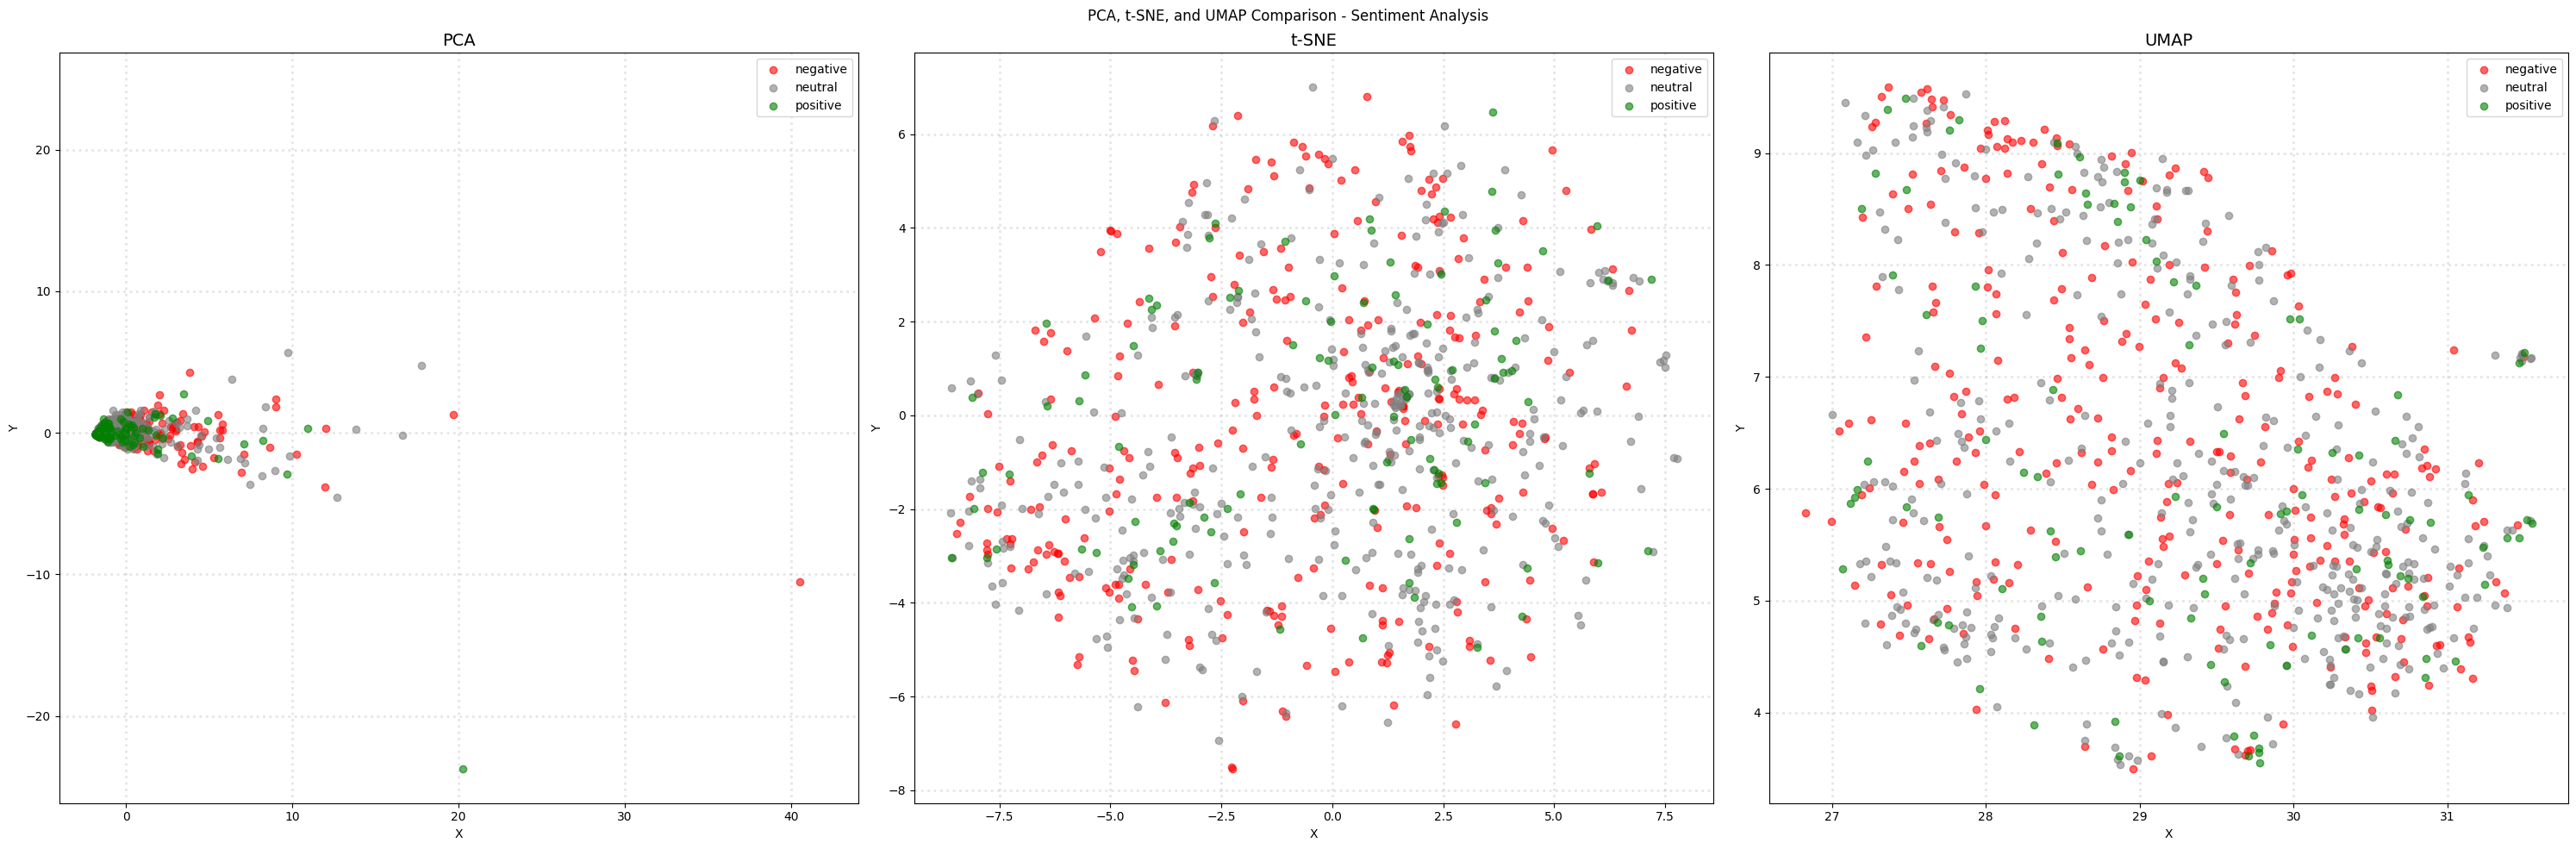

In [133]:
# Plot the results in subplots
col = ['red', 'gray', 'green'] 
categories = X['label_name'].unique()  

fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison - Sentiment Analysis')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        mask = X['label_name'] == category  
        xs = X_reduced[X['label_name'] == category].T[0]
        ys = X_reduced[X['label_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category, alpha=0.6)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.tight_layout()
plt.show()

In [134]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

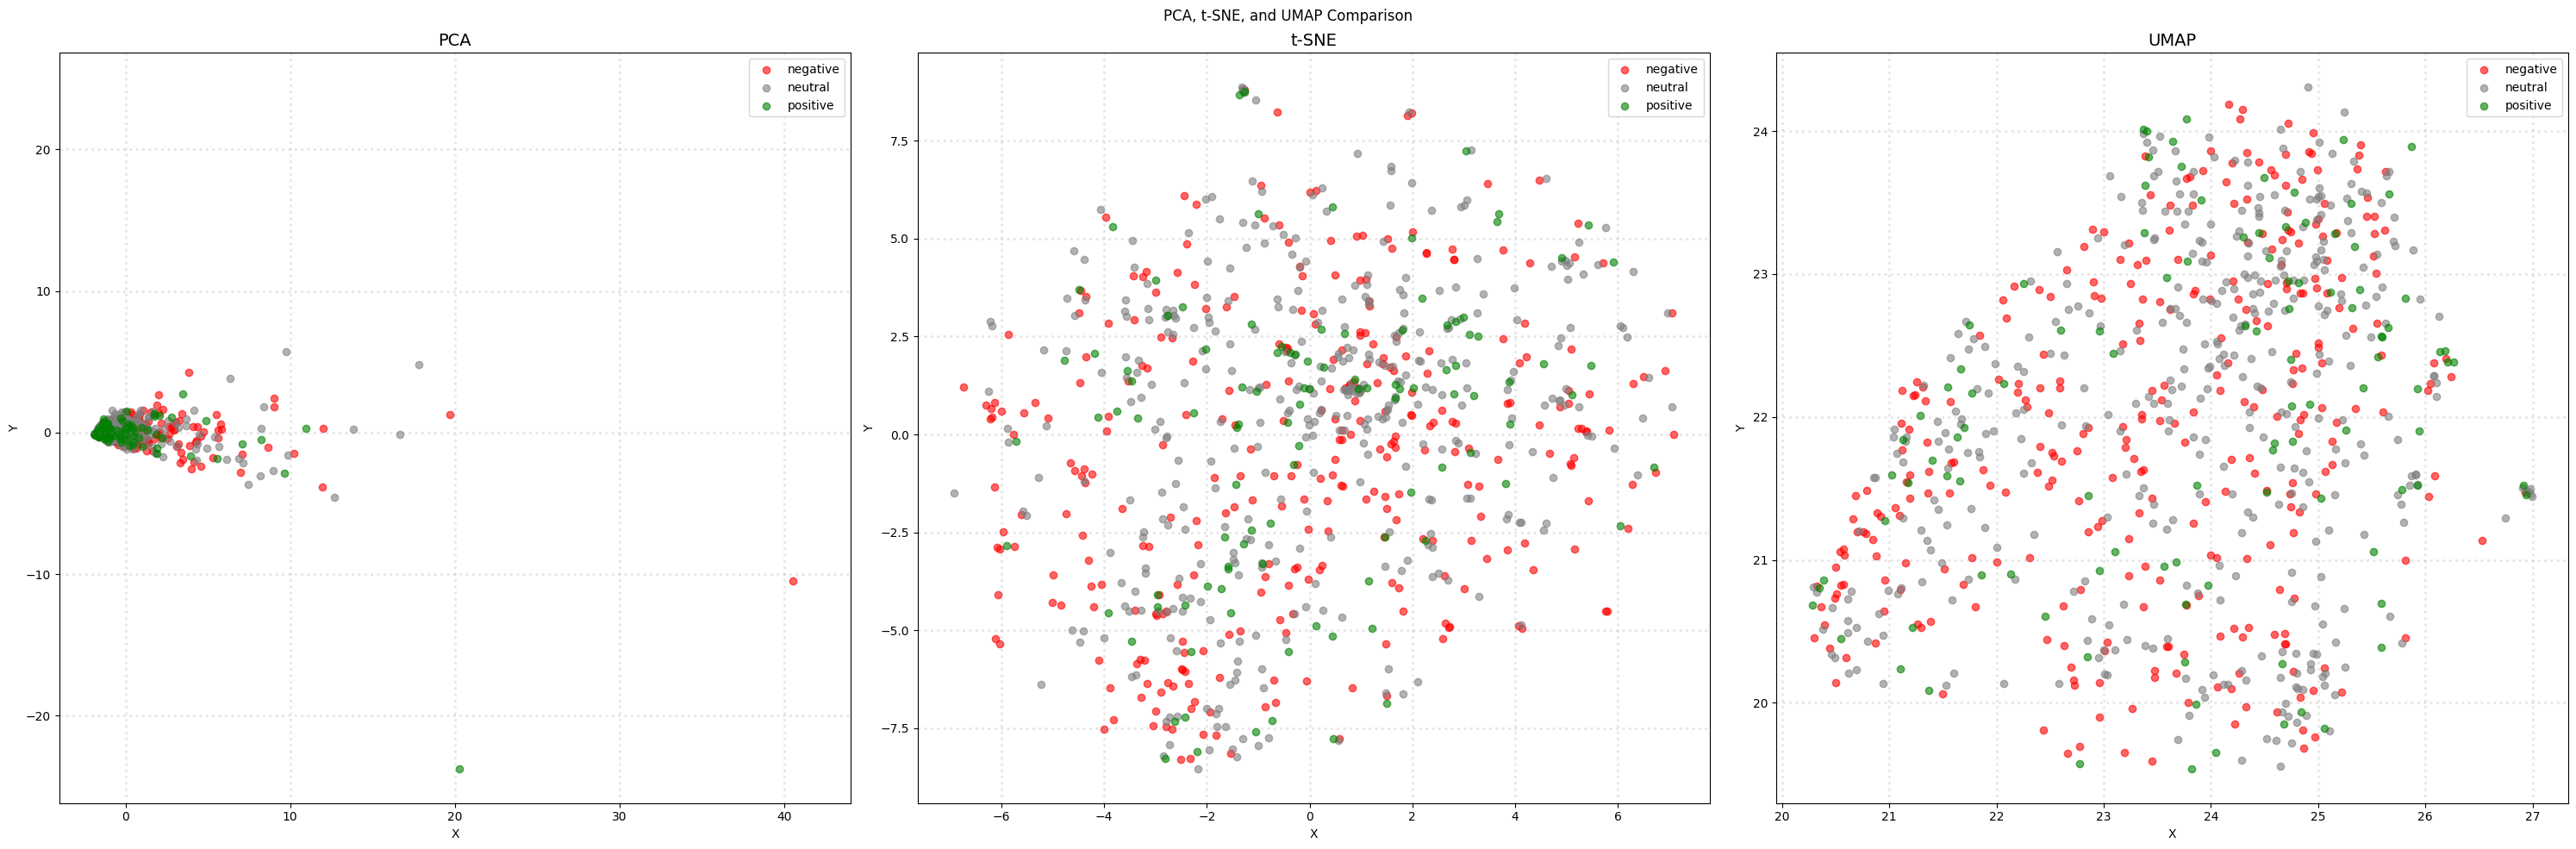

In [135]:
# Plot augmented results
col = ['red', 'gray', 'green']
categories = X['label_name'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        mask = X['label_name'] == category
        xs = X_reduced[X['label_name'] == category].T[0]
        ys = X_reduced[X['label_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category, alpha=0.6)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.tight_layout()
plt.show()

### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [136]:

from mpl_toolkits.mplot3d import Axes3D
#3D DIMENSIONALITY REDUCTION 
X_pca_3d = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_3d = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_3d = umap.UMAP(n_components=3).fit_transform(tdm_df.values) 

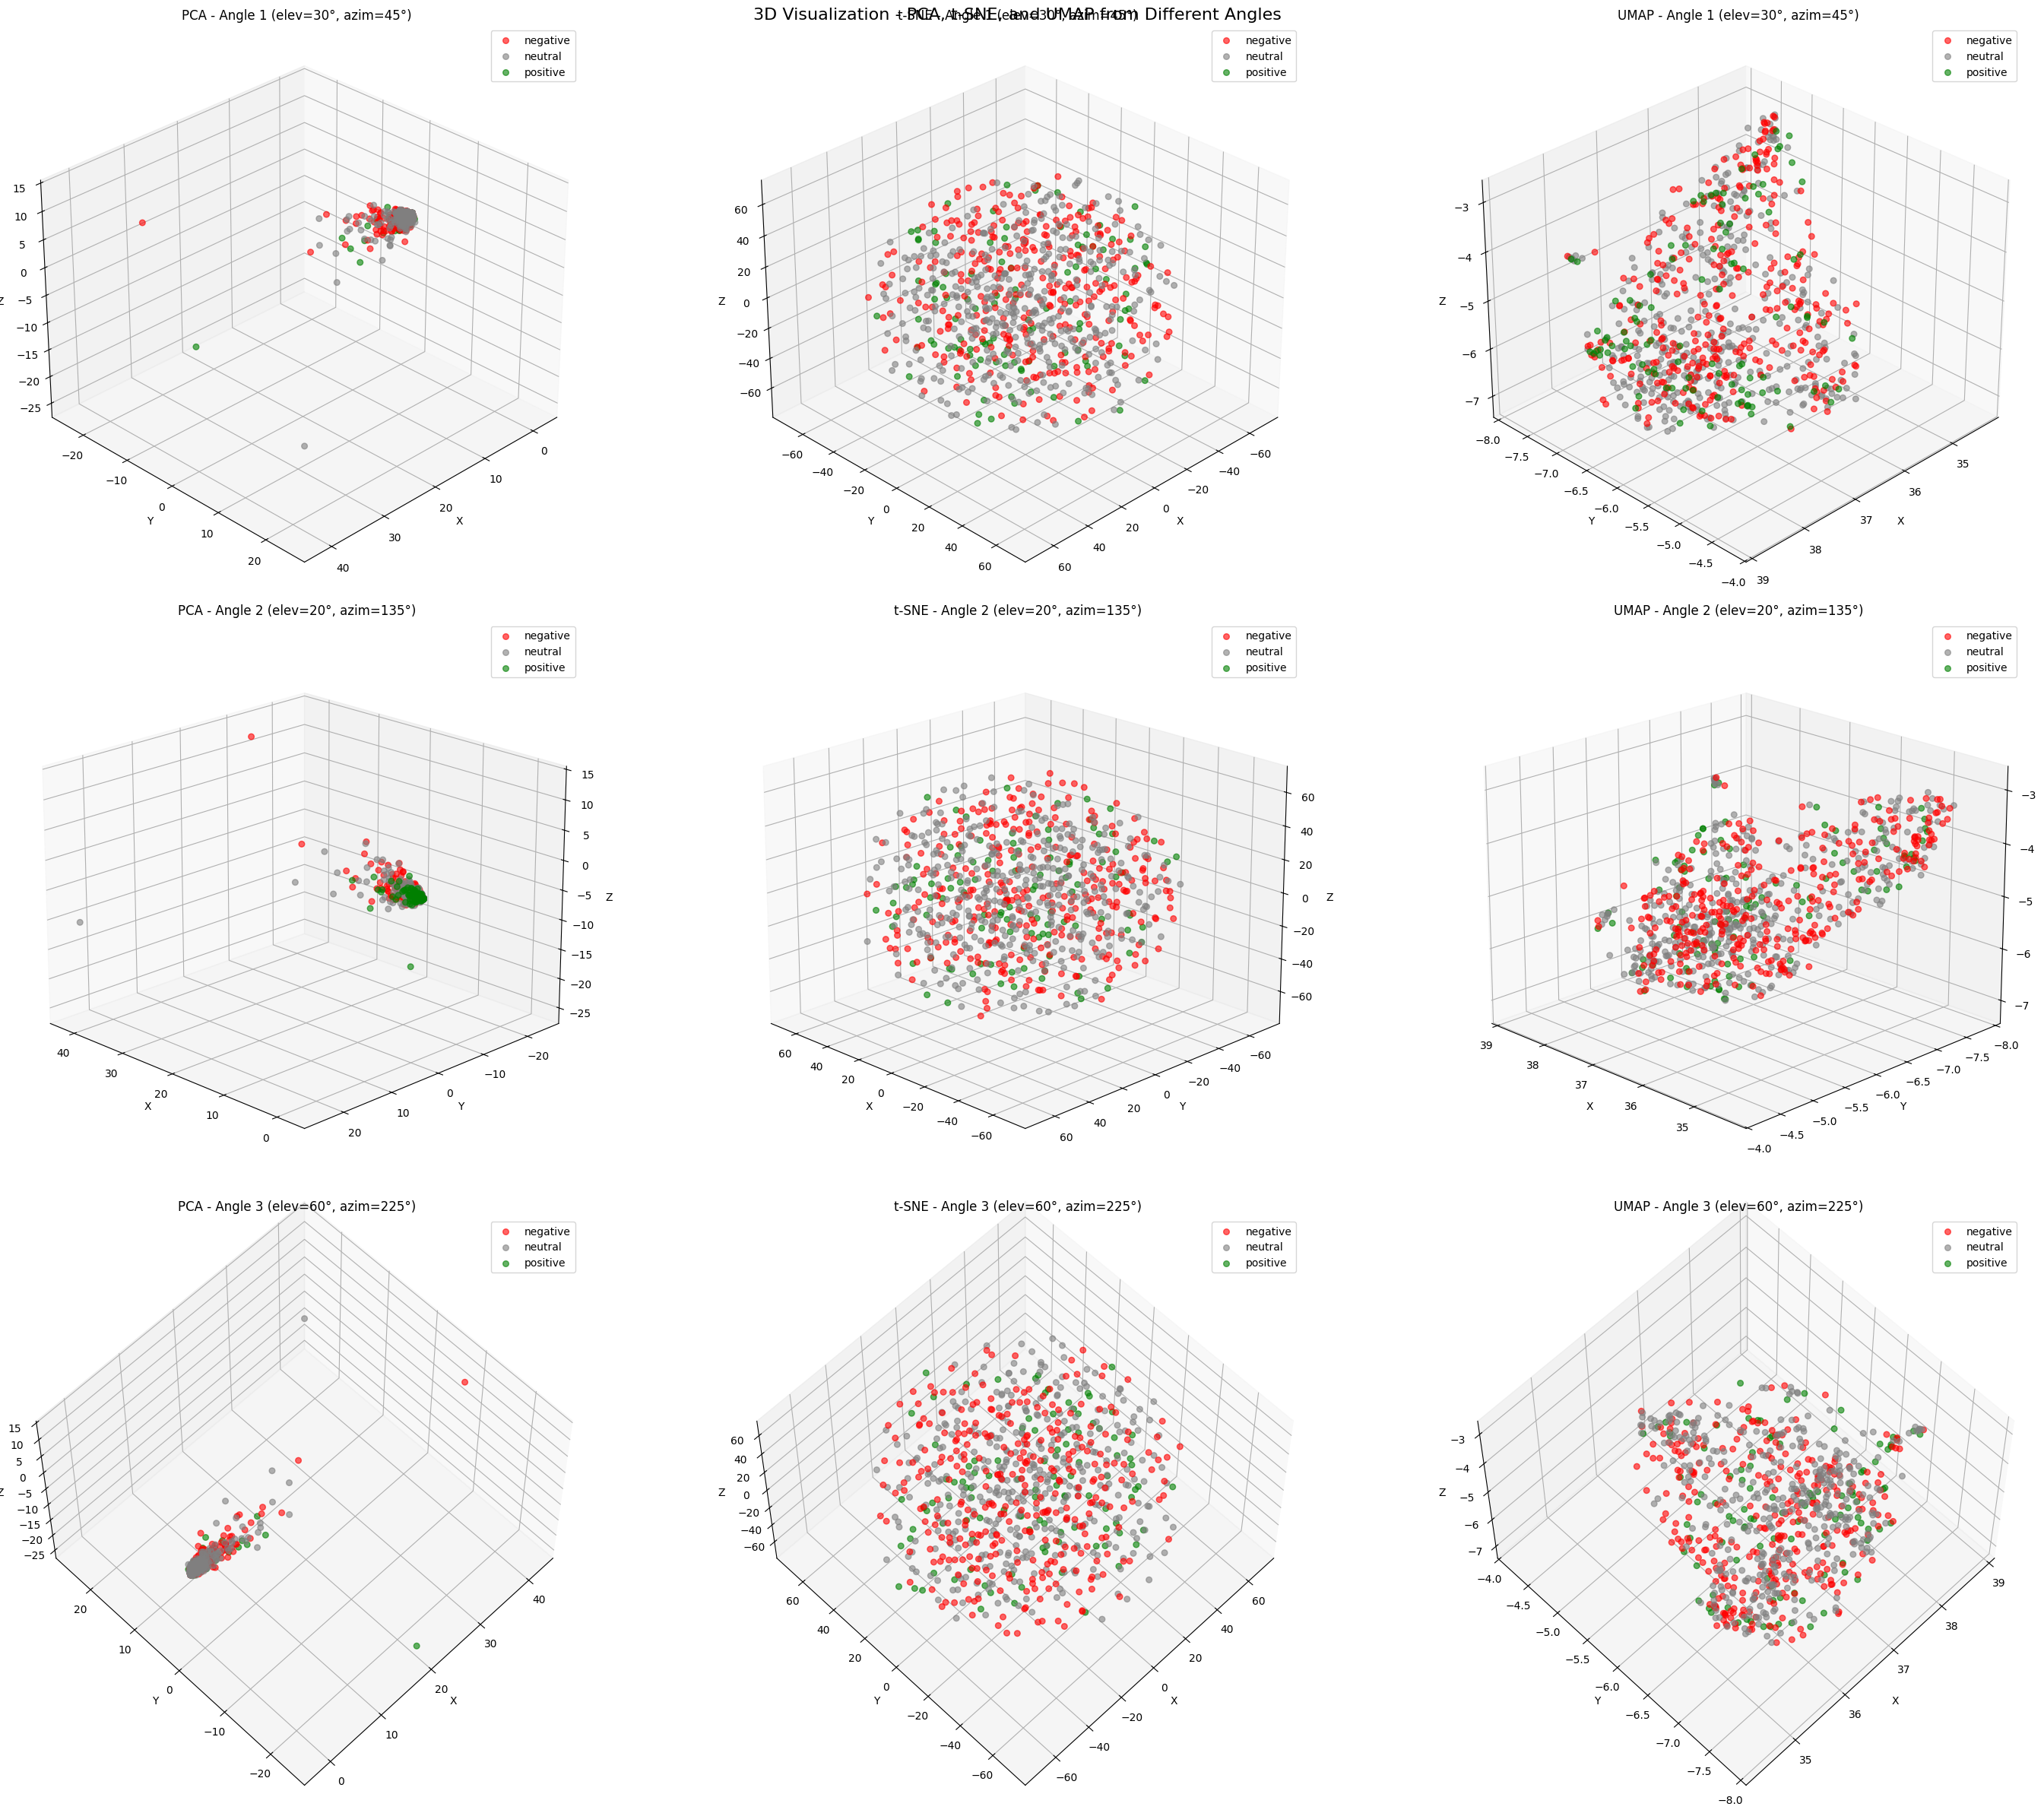

In [137]:
from mpl_toolkits.mplot3d import Axes3D

# Define colors and categories
col = ['red', 'gray', 'green']  
categories = X['label_name'].unique()  

# Define 3 different camera angles
angles = [(30, 45), (20, 135), (60, 225)]

# Create 3D plots with different angles
fig = plt.figure(figsize=(30, 24))
fig.suptitle('3D Visualization - PCA, t-SNE, and UMAP from Different Angles', fontsize=16)

for angle_idx, (elev, azim) in enumerate(angles):
    # PCA
    ax = fig.add_subplot(3, 3, angle_idx*3 + 1, projection='3d')
    for c, category in zip(col, categories):
        mask = X['label_name'] == category  
        ax.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 1], X_pca_3d[mask, 2], 
                  c=c, marker='o', label=category, alpha=0.6, s=30)
    ax.set_title(f'PCA - Angle {angle_idx+1} (elev={elev}°, azim={azim}°)')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    ax.view_init(elev=elev, azim=azim)
    
    # t-SNE
    ax = fig.add_subplot(3, 3, angle_idx*3 + 2, projection='3d')
    for c, category in zip(col, categories):
        mask = X['label_name'] == category  
        ax.scatter(X_tsne_3d[mask, 0], X_tsne_3d[mask, 1], X_tsne_3d[mask, 2], 
                  c=c, marker='o', label=category, alpha=0.6, s=30)
    ax.set_title(f't-SNE - Angle {angle_idx+1} (elev={elev}°, azim={azim}°)')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    ax.view_init(elev=elev, azim=azim)
    
    # UMAP
    ax = fig.add_subplot(3, 3, angle_idx*3 + 3, projection='3d')
    for c, category in zip(col, categories):
        mask = X['label_name'] == category  
        ax.scatter(X_umap_3d[mask, 0], X_umap_3d[mask, 1], X_umap_3d[mask, 2], 
                  c=c, marker='o', label=category, alpha=0.6, s=30)
    ax.set_title(f'UMAP - Angle {angle_idx+1} (elev={elev}°, azim={azim}°)')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    ax.view_init(elev=elev, azim=azim)

plt.tight_layout()
plt.show()

In [138]:
X_pca_aug_3d = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug_3d = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug_3d = umap.UMAP(n_components=3).fit_transform(augmented_df.values) 

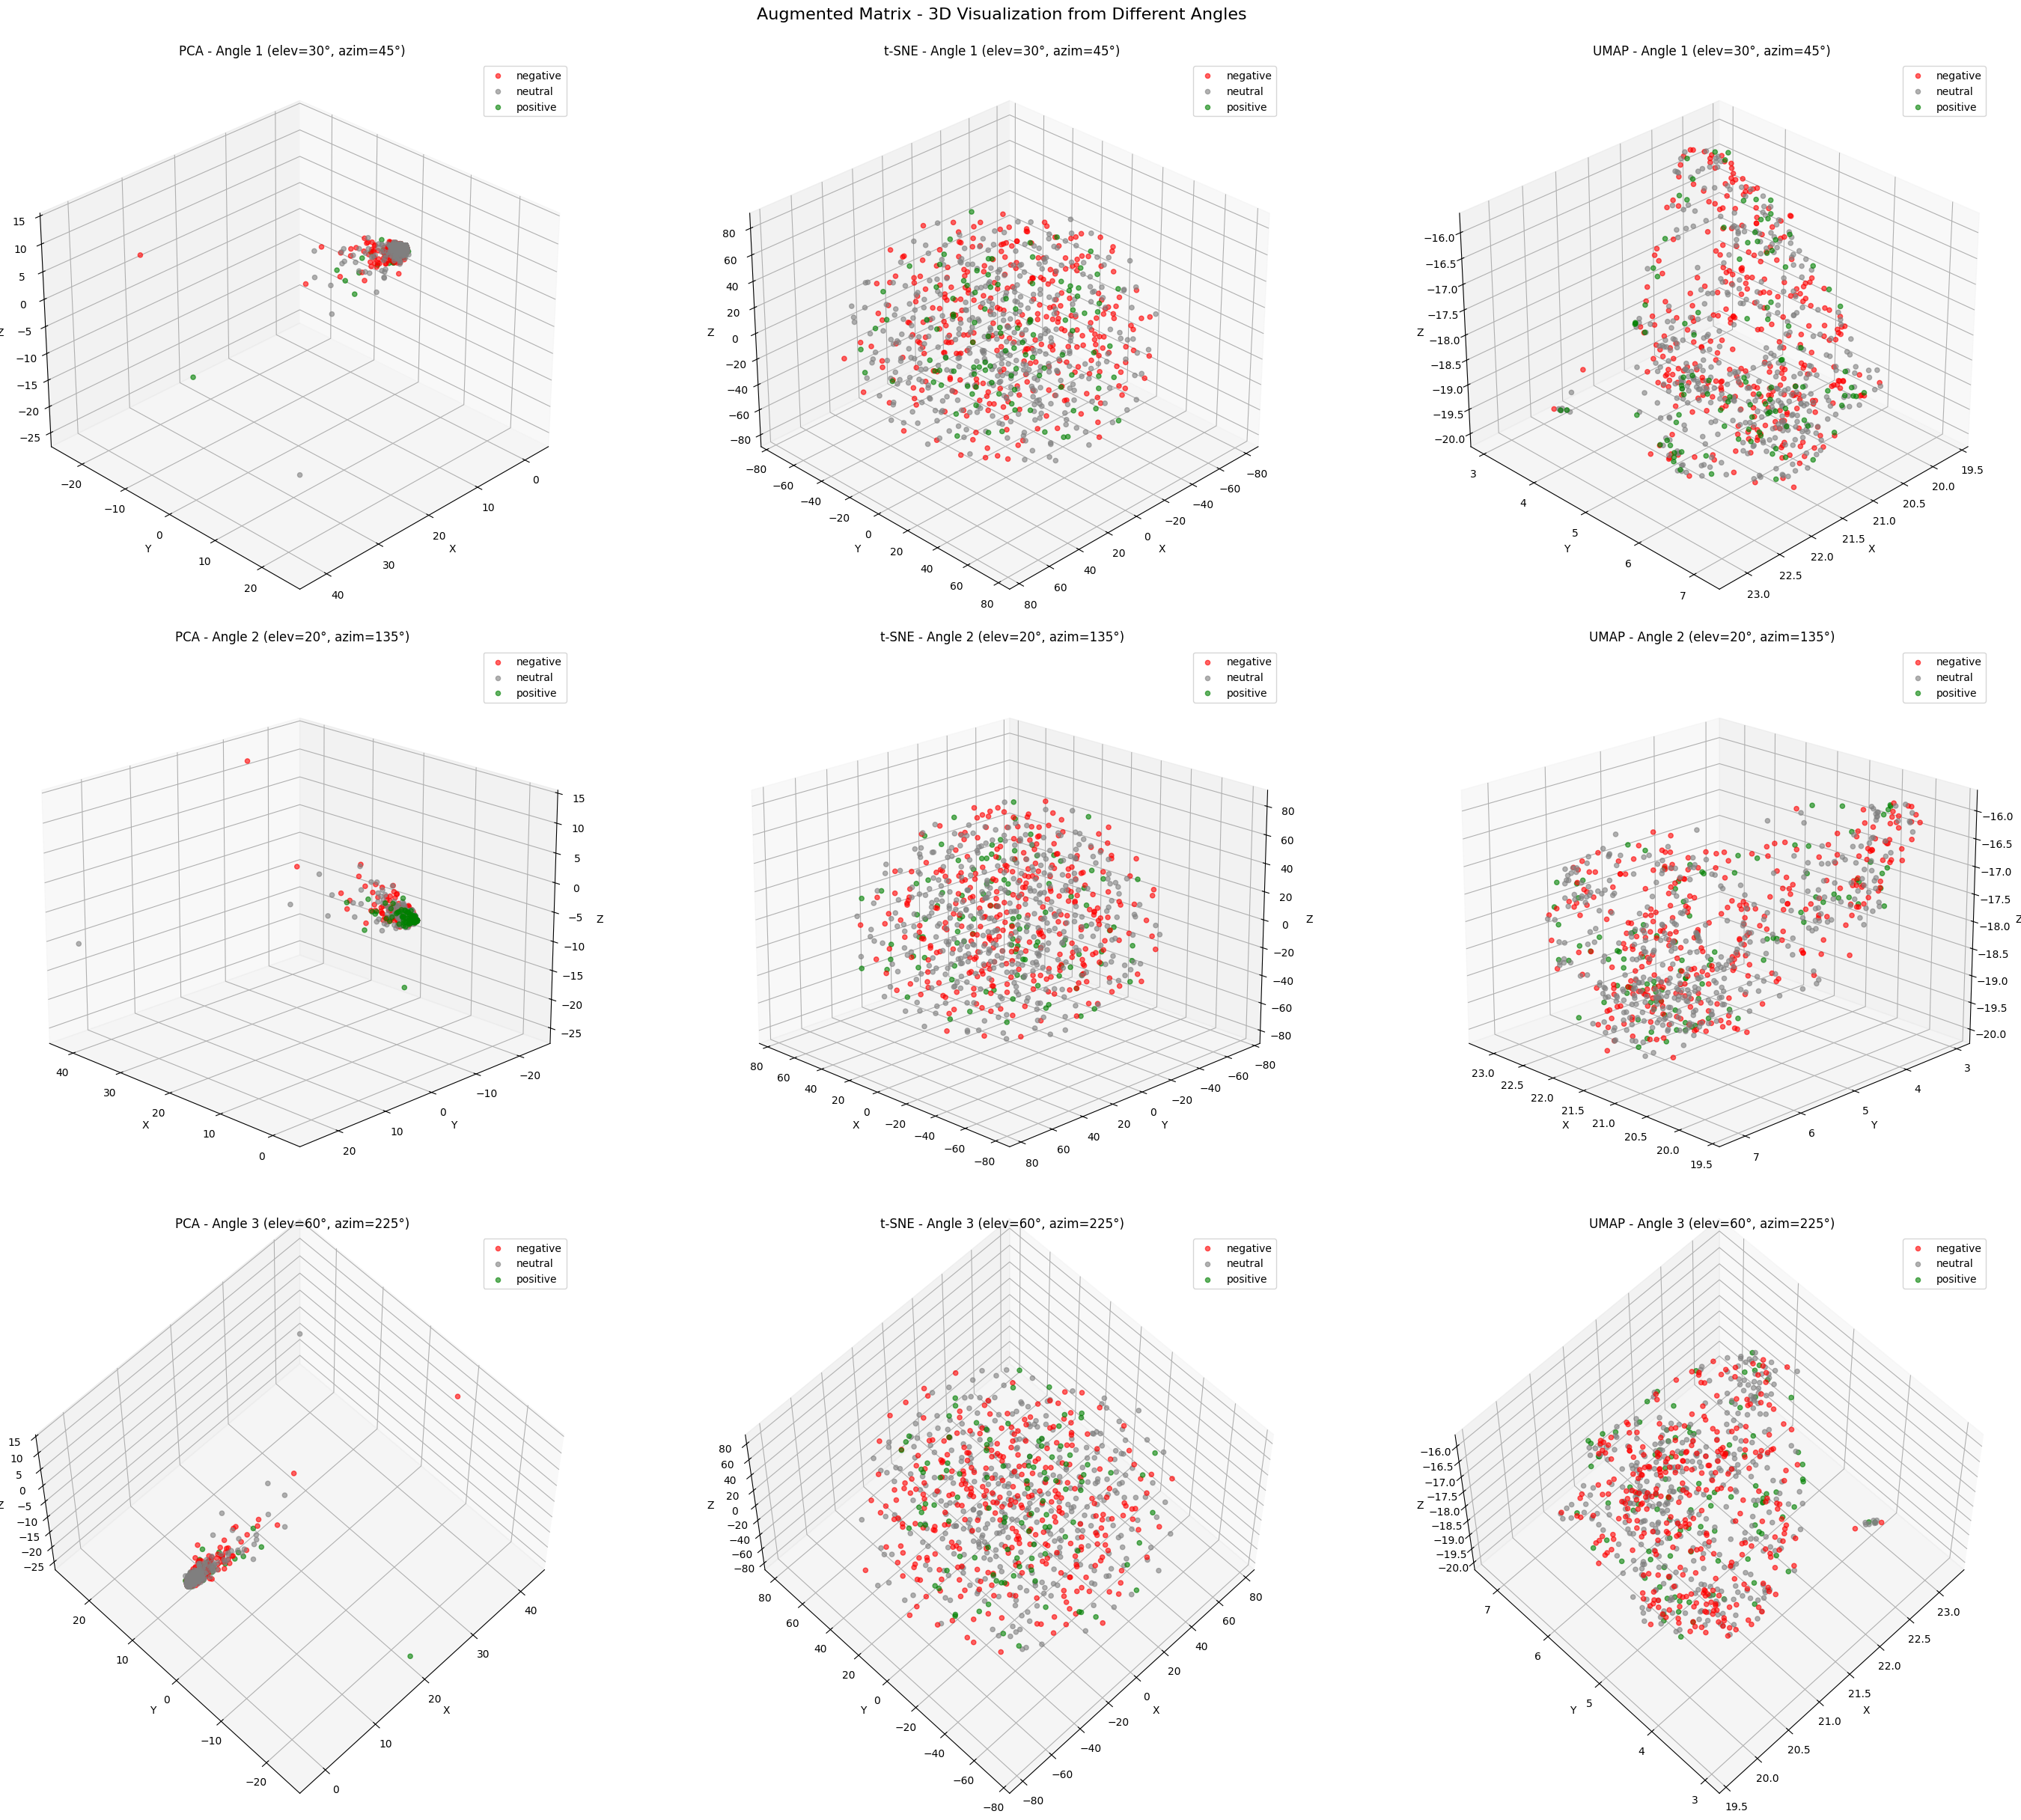

In [139]:
fig2 = plt.figure(figsize=(30, 24))
fig2.suptitle('Augmented Matrix - 3D Visualization from Different Angles', fontsize=16, y=1)

for angle_idx, (elev, azim) in enumerate(angles):
    # PCA
    ax = fig2.add_subplot(3, 3, angle_idx*3 + 1, projection='3d')
    for c, category in zip(col, categories):
        mask = X['label_name'] == category
        ax.scatter(X_pca_aug_3d[mask, 0], X_pca_aug_3d[mask, 1], X_pca_aug_3d[mask, 2], 
                  c=c, marker='o', label=category, alpha=0.6)
    ax.set_title(f'PCA - Angle {angle_idx+1} (elev={elev}°, azim={azim}°)')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    ax.view_init(elev=elev, azim=azim)
    
    # t-SNE
    ax = fig2.add_subplot(3, 3, angle_idx*3 + 2, projection='3d')
    for c, category in zip(col, categories):
        mask = X['label_name'] == category
        ax.scatter(X_tsne_aug_3d[mask, 0], X_tsne_aug_3d[mask, 1], X_tsne_aug_3d[mask, 2], 
                  c=c, marker='o', label=category, alpha=0.6)
    ax.set_title(f't-SNE - Angle {angle_idx+1} (elev={elev}°, azim={azim}°)')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    ax.view_init(elev=elev, azim=azim)
    
    # UMAP
    ax = fig2.add_subplot(3, 3, angle_idx*3 + 3, projection='3d')
    for c, category in zip(col, categories):
        mask = X['label_name'] == category
        ax.scatter(X_umap_aug_3d[mask, 0], X_umap_aug_3d[mask, 1], X_umap_aug_3d[mask, 2], 
                  c=c, marker='o', label=category, alpha=0.6)
    ax.set_title(f'UMAP - Angle {angle_idx+1} (elev={elev}°, azim={azim}°)')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    ax.view_init(elev=elev, azim=azim)

plt.tight_layout()
plt.show()

### 5.6 Discretization and Binarization

In [140]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [141]:
mlb = preprocessing.LabelBinarizer()

In [142]:
mlb.fit(X.label)

LabelBinarizer()

In [143]:
X['bin_label'] = mlb.transform(X['label']).tolist()

In [144]:
X[0:9]

text  label label_name  \
0                                   Calls on retards   -1.0   negative   
1  Stunt as in like why did they even make a big ...    0.0    neutral   
2                  Seeing lots of red in the ticker.    0.0    neutral   
3  Vision Marine Technologies Inc. is rewriting t...    1.0   positive   
4                           He didn’t say thank you.   -1.0   negative   
5  Hoping to ejaculate in wet warm puss tonight, ...    0.0    neutral   
6  Trump will respond to china increasing their t...   -1.0   negative   
7  Confirmed not a trap. Its been like this for p...    0.0    neutral   
8  Am I the only one seeing the cup & handle brea...    1.0   positive   

                                            unigrams  \
0                               [Calls, on, retards]   
1  [Stunt, as, in, like, why, did, they, even, ma...   
2        [Seeing, lots, of, red, in, the, ticker, .]   
3  [Vision, Marine, Technologies, Inc., is, rewri...   
4               [He, didn, ’, t, say, thank, you, .]   
5  [Hoping, to, ejaculate, in, wet, warm, puss, t...   
6  [Trump, will, respond, to, china, increasing, ...   
7  [Confirmed, not, a, trap, ., Its, been, like, ...   
8  [Am, I, the, only, one, seeing, the, cup, &, h...   

                                      tokenized_text  bin_label  
0                               {retards, on, Calls}  [1, 0, 0]  
1  {even, about, ever, place?, they, the, first, ...  [0, 1, 0]  
2          {lots, of, in, Seeing, ticker., red, the}  [0, 1, 0]  
3  {The, about, astonishing, your, felt, electric...  [0, 0, 1]  
4                     {didn’t, He, you., thank, say}  [1, 0, 0]  
5  {wet, luck, Hoping, wish, puss, tonight,, in, ...  [0, 1, 0]  
6  {their, is, think, respond, be, down, even, br...  [1, 0, 0]  
7  {word, have, we, been, mouth, of, it, not, spr...  [0, 1, 0]  
8  {base, The, seeing, handle, Am, here?, the, Gr...  [0, 0, 1]

### >>> **Exercise 19:**

In [145]:
mlb_name = preprocessing.LabelBinarizer()
mlb_name.fit(X['label_name'])
X['bin_label_name'] = mlb_name.transform(X['label_name']).tolist()

In [146]:
X[0:9]

text  label label_name  \
0                                   Calls on retards   -1.0   negative   
1  Stunt as in like why did they even make a big ...    0.0    neutral   
2                  Seeing lots of red in the ticker.    0.0    neutral   
3  Vision Marine Technologies Inc. is rewriting t...    1.0   positive   
4                           He didn’t say thank you.   -1.0   negative   
5  Hoping to ejaculate in wet warm puss tonight, ...    0.0    neutral   
6  Trump will respond to china increasing their t...   -1.0   negative   
7  Confirmed not a trap. Its been like this for p...    0.0    neutral   
8  Am I the only one seeing the cup & handle brea...    1.0   positive   

                                            unigrams  \
0                               [Calls, on, retards]   
1  [Stunt, as, in, like, why, did, they, even, ma...   
2        [Seeing, lots, of, red, in, the, ticker, .]   
3  [Vision, Marine, Technologies, Inc., is, rewri...   
4               [He, didn, ’, t, say, thank, you, .]   
5  [Hoping, to, ejaculate, in, wet, warm, puss, t...   
6  [Trump, will, respond, to, china, increasing, ...   
7  [Confirmed, not, a, trap, ., Its, been, like, ...   
8  [Am, I, the, only, one, seeing, the, cup, &, h...   

                                      tokenized_text  bin_label bin_label_name  
0                               {retards, on, Calls}  [1, 0, 0]      [1, 0, 0]  
1  {even, about, ever, place?, they, the, first, ...  [0, 1, 0]      [0, 1, 0]  
2          {lots, of, in, Seeing, ticker., red, the}  [0, 1, 0]      [0, 1, 0]  
3  {The, about, astonishing, your, felt, electric...  [0, 0, 1]      [0, 0, 1]  
4                     {didn’t, He, you., thank, say}  [1, 0, 0]      [1, 0, 0]  
5  {wet, luck, Hoping, wish, puss, tonight,, in, ...  [0, 1, 0]      [0, 1, 0]  
6  {their, is, think, respond, be, down, even, br...  [1, 0, 0]      [1, 0, 0]  
7  {word, have, we, been, mouth, of, it, not, spr...  [0, 1, 0]      [0, 1, 0]  
8  {base, The, seeing, handle, Am, here?, the, Gr...  [0, 0, 1]      [0, 0, 1]

# 6. Data Exploration

In [147]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[200]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [148]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["It's a copy/paste from a Bloomberg terminal."]
["I think it's actually illegal to say how I feel"]
['Calling it anything but a trade embargo at this point is PR spin.']


In [149]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [150]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.144338
Cosine Similarity using count bw 1 and 3: 0.117851
Cosine Similarity using count bw 2 and 3: 0.102062
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/02/wd76cl5111998yc2yd1_vcv00000gn/T/ipykernel_1875/452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/02/wd76cl5111998yc2yd1_vcv00000gn/T/ipykernel_1875/452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/02/wd76cl5111998yc2yd1_vcv00000gn/T/ipykernel_1875/452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/02/wd76cl5111998yc2yd1_vcv00000gn/T/ipykernel_1875/452772485.py:17: Depreca

### >>> **Exercise 20:**

In [151]:
document_test_1 = []
document_test_1.append(X.iloc[0]['text'])

document_test_2 = []
document_test_2.append(X.iloc[1]['text'])

document_test_3 = []
document_test_3.append(X.iloc[5]['text'])

doc_vec_1 = count_vect.transform(document_test_1)
doc_vec_2 = count_vect.transform(document_test_2)
doc_vec_3 = count_vect.transform(document_test_3)

print(f"Doc 1 sentiment: {X.iloc[0]['label_name']}")
print(f"Doc 2 sentiment: {X.iloc[1]['label_name']}")
print(f"Doc 3 sentiment: {X.iloc[5]['label_name']}")

cos_sim_1_2 = cosine_similarity(doc_vec_1, doc_vec_2)
cos_sim_1_3 = cosine_similarity(doc_vec_1, doc_vec_3)
cos_sim_2_3 = cosine_similarity(doc_vec_2, doc_vec_3)

print(f"\nCosine Similarity 1-2: {cos_sim_1_2[0][0]:.4f}")
print(f"Cosine Similarity 1-3: {cos_sim_1_3[0][0]:.4f}")
print(f"Cosine Similarity 2-3: {cos_sim_2_3[0][0]:.4f}")

Doc 1 sentiment: negative
Doc 2 sentiment: neutral
Doc 3 sentiment: neutral

Cosine Similarity 1-2: 0.0000
Cosine Similarity 1-3: 0.0000
Cosine Similarity 2-3: 0.1066


In [152]:
document_test_1 = []
document_test_1.append(X.iloc[0]['text'])

document_test_2 = []
document_test_2.append(X.iloc[7]['text'])

document_test_3 = []
document_test_3.append(X.iloc[2]['text'])

doc_vec_1 = count_vect.transform(document_test_1)
doc_vec_2 = count_vect.transform(document_test_2)
doc_vec_3 = count_vect.transform(document_test_3)

print(f"Doc 1 sentiment: {X.iloc[0]['label_name']}")
print(f"Doc 2 sentiment: {X.iloc[1]['label_name']}")
print(f"Doc 3 sentiment: {X.iloc[5]['label_name']}")

cos_sim_1_2 = cosine_similarity(doc_vec_1, doc_vec_2)
cos_sim_1_3 = cosine_similarity(doc_vec_1, doc_vec_3)
cos_sim_2_3 = cosine_similarity(doc_vec_2, doc_vec_3)

print(f"\nCosine Similarity 1-2: {cos_sim_1_2[0][0]:.4f}")
print(f"Cosine Similarity 1-3: {cos_sim_1_3[0][0]:.4f}")
print(f"Cosine Similarity 2-3: {cos_sim_2_3[0][0]:.4f}")

Doc 1 sentiment: negative
Doc 2 sentiment: neutral
Doc 3 sentiment: neutral

Cosine Similarity 1-2: 0.0000
Cosine Similarity 1-3: 0.0000
Cosine Similarity 2-3: 0.0825


In [153]:
negative_idx = X[X['label_name'] == 'negative'].index[0]
positive_idx = X[X['label_name'] == 'positive'].index[0]
positive_idx_2 = X[X['label_name'] == 'positive'].index[1]

document_test_1 = []
document_test_1.append(X.iloc[negative_idx]['text'])

document_test_2 = []
document_test_2.append(X.iloc[positive_idx]['text'])

document_test_3 = []
document_test_3.append(X.iloc[positive_idx_2]['text'])

doc_vec_1 = count_vect.transform(document_test_1)
doc_vec_2 = count_vect.transform(document_test_2)
doc_vec_3 = count_vect.transform(document_test_3)

print(f"Doc 1 sentiment: {X.iloc[negative_idx]['label_name']}")
print(f"Doc 2 sentiment: {X.iloc[positive_idx]['label_name']}")
print(f"Doc 3 sentiment: {X.iloc[positive_idx_2]['label_name']}")

cos_sim_1_2 = cosine_similarity(doc_vec_1, doc_vec_2)
cos_sim_1_3 = cosine_similarity(doc_vec_1, doc_vec_3)
cos_sim_2_3 = cosine_similarity(doc_vec_2, doc_vec_3)

print(f"\nCosine Similarity 1-2 (neg vs pos): {cos_sim_1_2[0][0]:.4f}")
print(f"Cosine Similarity 1-3 (neg vs pos): {cos_sim_1_3[0][0]:.4f}")
print(f"Cosine Similarity 2-3 (pos vs pos): {cos_sim_2_3[0][0]:.4f}")

Doc 1 sentiment: negative
Doc 2 sentiment: positive
Doc 3 sentiment: positive

Cosine Similarity 1-2 (neg vs pos): 0.0585
Cosine Similarity 1-3 (neg vs pos): 0.0772
Cosine Similarity 2-3 (pos vs pos): 0.3049


# 7. Data Classification


In [154]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to sentiment names
label_mapping = dict(X[['label', 'label_name']].drop_duplicates().values)

# Convert the numerical labels to text labels
target_names = [label_mapping[label] for label in sorted(label_mapping.keys())]

print(f"Target names: {target_names}")

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['label'], test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Target names: ['negative', 'neutral', 'positive']
Training set: (569, 4313)
Test set: (244, 4313)


In [155]:
X_train

00  000  01378  02  027  03  06  08  10  100  ...  yours  yourself  \
706   0    0      0   0    0   0   0   0   0    0  ...      0         0   
136   0    0      0   0    0   0   0   0   0    0  ...      0         0   
392   0    0      0   0    0   0   0   0   0    0  ...      0         0   
274   0    0      0   0    0   0   0   0   0    0  ...      0         0   
458   0    0      0   0    0   0   0   0   0    0  ...      0         0   
..   ..  ...    ...  ..  ...  ..  ..  ..  ..  ...  ...    ...       ...   
74    0    0      0   0    0   0   0   0   0    0  ...      0         0   
110   0    0      0   0    0   0   0   0   0    0  ...      0         0   
278   0    0      0   0    0   0   0   0   0    0  ...      0         0   
451   0    0      0   0    0   0   0   0   0    0  ...      0         0   
106   0    0      0   0    0   0   0   0   0    0  ...      0         0   

     yourselves  youtube  yoyo  yup  zero  zgld  zone  zsil  
706           0        0     0    0     0     0     0     0  
136           0        0     0    0     0     0     0     0  
392           0        0     0    0     0     0     0     0  
274           0        0     0    0     0     0     0     0  
458           0        0     0    0     0     0     0     0  
..          ...      ...   ...  ...   ...   ...   ...   ...  
74            0        0     0    0     0     0     0     0  
110           0        0     0    0     0     0     0     0  
278           0        0     0    0     0     0     0     0  
451           0        0     0    0     0     0     0     0  
106           0        0     0    0     0     0     0     0  

[569 rows x 4313 columns]

In [156]:
X_test

00  000  01378  02  027  03  06  08  10  100  ...  yours  yourself  \
255   0    0      0   0    0   0   0   0   0    0  ...      0         0   
613   0    0      0   0    0   0   0   0   0    0  ...      0         0   
235   0    0      0   0    0   0   0   0   0    0  ...      0         0   
300   0    0      0   0    0   0   0   0   0    0  ...      0         0   
560   0    0      0   0    0   0   0   0   0    0  ...      0         0   
..   ..  ...    ...  ..  ...  ..  ..  ..  ..  ...  ...    ...       ...   
149   0    0      0   0    0   0   0   0   0    0  ...      0         0   
600   0    0      0   0    0   0   0   0   0    0  ...      0         0   
242   0    0      0   0    0   0   0   0   0    0  ...      0         0   
228   0    0      0   0    0   0   0   0   1    0  ...      0         0   
315   0    0      0   0    0   0   0   0   0    0  ...      0         0   

     yourselves  youtube  yoyo  yup  zero  zgld  zone  zsil  
255           0        0     0    0     0     0     0     0  
613           0        0     0    0     0     0     0     0  
235           0        0     0    0     0     0     0     0  
300           0        0     0    0     0     0     0     0  
560           0        0     0    0     0     0     0     0  
..          ...      ...   ...  ...   ...   ...   ...   ...  
149           0        0     0    0     0     0     0     0  
600           0        0     0    0     0     0     0     0  
242           0        0     0    0     0     0     0     0  
228           0        0     0    0     0     0     0     0  
315           0        0     0    0     0     0     0     0  

[244 rows x 4313 columns]

In [157]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5532786885245902

Classification Report:
               precision    recall  f1-score   support

    negative     0.5192    0.8351    0.6403        97
     neutral     0.6667    0.4463    0.5347       121
    positive     0.0000    0.0000    0.0000        26

    accuracy                         0.5533       244
   macro avg     0.3953    0.4271    0.3917       244
weighted avg     0.5370    0.5533    0.5197       244



### >>> **Exercise 21:**

In [158]:
# Split augmented data
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    augmented_df, X['label'], test_size=0.3, random_state=42
)

print(f"Augmented training set: {X_train_aug.shape}")
print(f"Augmented test set: {X_test_aug.shape}")

# Train Naive Bayes on augmented data
nb_classifier_aug = MultinomialNB()
nb_classifier_aug.fit(X_train_aug, y_train_aug)

# Predictions
y_pred_aug = nb_classifier_aug.predict(X_test_aug)

# Evaluate
print("\nAccuracy:", accuracy_score(y_test_aug, y_pred_aug))
print("\nClassification Report:")
print(classification_report(y_test_aug, y_pred_aug, target_names=target_names, digits=4))

Augmented training set: (569, 4318)
Augmented test set: (244, 4318)

Accuracy: 0.5532786885245902

Classification Report:
              precision    recall  f1-score   support

    negative     0.5192    0.8351    0.6403        97
     neutral     0.6667    0.4463    0.5347       121
    positive     0.0000    0.0000    0.0000        26

    accuracy                         0.5533       244
   macro avg     0.3953    0.4271    0.3917       244
weighted avg     0.5370    0.5533    0.5197       244



### >>> **Exercise 22:**

In [159]:
# Comparison
print("\n" + "="*70)
print("COMPARISON")
print("="*70)
print(f"Original TDM Accuracy:   {accuracy_score(y_test, y_pred):.4f}")
print(f"Augmented Accuracy:      {accuracy_score(y_test_aug, y_pred_aug):.4f}")
print(f"Improvement:             {(accuracy_score(y_test_aug, y_pred_aug) - accuracy_score(y_test, y_pred)):.4f}")


COMPARISON
Original TDM Accuracy:   0.5533
Augmented Accuracy:      0.5533
Improvement:             0.0000


# Decision Tree Classifier

In [160]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['label'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.48360655737704916

Classification Report:
               precision    recall  f1-score   support

    negative     0.4713    0.4227    0.4457        97
     neutral     0.5489    0.6033    0.5748       121
    positive     0.1667    0.1538    0.1600        26

    accuracy                         0.4836       244
   macro avg     0.3956    0.3933    0.3935       244
weighted avg     0.4773    0.4836    0.4793       244



## Exercise 23 

In [161]:
print("\n" + "="*70)
print("EXERCISE 23: Why DT < NB?")
print("="*70)
print("Reasons:")
print("1. High-dimensional sparse data (many features, mostly 0s)")
print("2. Decision Trees overfit easily with sparse text data")
print("3. Naive Bayes designed for text classification")
print("4. DT sequential splits vs NB simultaneous features")


EXERCISE 23: Why DT < NB?
Reasons:
1. High-dimensional sparse data (many features, mostly 0s)
2. Decision Trees overfit easily with sparse text data
3. Naive Bayes designed for text classification
4. DT sequential splits vs NB simultaneous features


## Exercise 24: Decision Tree with Augmented Data

In [162]:
# Train on augmented data
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    augmented_df, X['label'], test_size=0.3, random_state=42
)

dt_classifier_aug = DecisionTreeClassifier(random_state=42)
dt_classifier_aug.fit(X_train_aug, y_train_aug)
y_pred_dt_aug = dt_classifier_aug.predict(X_test_aug)

print("Decision Tree Augmented Accuracy:", accuracy_score(y_test_aug, y_pred_dt_aug))
print("\nClassification Report:")
print(classification_report(y_test_aug, y_pred_dt_aug, target_names=target_names, digits=4))

# Comparison
print("\n" + "="*70)
print("COMPARISON SUMMARY")
print("="*70)
print(f"Naive Bayes (Original):    {accuracy_score(y_test, y_pred):.4f}")
print(f"Naive Bayes (Augmented):   {accuracy_score(y_test_aug, y_pred_aug):.4f}")
print(f"Decision Tree (Original):  {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Decision Tree (Augmented): {accuracy_score(y_test_aug, y_pred_dt_aug):.4f}")

print("\nObservation:")
print("- More features may worsen DT overfitting")
print("- NB handles high dimensions better")
print("- Patterns don't help DT's sequential splitting")

Decision Tree Augmented Accuracy: 0.4713114754098361

Classification Report:
              precision    recall  f1-score   support

    negative     0.4271    0.4227    0.4249        97
     neutral     0.5312    0.5620    0.5462       121
    positive     0.3000    0.2308    0.2609        26

    accuracy                         0.4713       244
   macro avg     0.4194    0.4051    0.4106       244
weighted avg     0.4652    0.4713    0.4676       244


COMPARISON SUMMARY
Naive Bayes (Original):    0.5533
Naive Bayes (Augmented):   0.5533
Decision Tree (Original):  0.4836
Decision Tree (Augmented): 0.4713

Observation:
- More features may worsen DT overfitting
- NB handles high dimensions better
- Patterns don't help DT's sequential splitting


## Exercise 25: How to Choose Best Model

In [163]:
print("="*70)
print("EXERCISE 25: CHOOSING THE BEST MODEL")
print("="*70)

print("""
Steps to Choose Best Model:

1. Understand Data:
   - Data type (text, image, numerical)
   - Size (samples vs features)
   - Sparsity level

2. Try Multiple Models:
   - Start with simple baselines
   - Test different algorithms
   - Compare performance

3. Evaluation Metrics:
   - Accuracy, Precision, Recall, F1
   - Consider class imbalance

4. Practical Factors:
   - Training time
   - Prediction speed
   - Model interpretability

5. Cross-Validation:
   - Use k-fold CV for robust estimate

For This Sentiment Classification task:
  ✓ Naive Bayes: Best choice for text
  ✗ Decision Tree: Not suitable for sparse data
  
Conclusion: Choose based on data characteristics + performance
""")

EXERCISE 25: CHOOSING THE BEST MODEL

Steps to Choose Best Model:

1. Understand Data:
   - Data type (text, image, numerical)
   - Size (samples vs features)
   - Sparsity level

2. Try Multiple Models:
   - Start with simple baselines
   - Test different algorithms
   - Compare performance

3. Evaluation Metrics:
   - Accuracy, Precision, Recall, F1
   - Consider class imbalance

4. Practical Factors:
   - Training time
   - Prediction speed
   - Model interpretability

5. Cross-Validation:
   - Use k-fold CV for robust estimate

For This Sentiment Classification task:
  ✓ Naive Bayes: Best choice for text
  ✗ Decision Tree: Not suitable for sparse data
  
Conclusion: Choose based on data characteristics + performance



In [164]:
# ==========================================
# TASK 3: TF-IDF FEATURE GENERATION & CLASSIFICATION
# ==========================================
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB 
# 1. Generate TF-IDF Features
print("\n" + "="*40)
print("GENERATING TF-IDF FEATURES")
print("="*40)
tfidf_vect = TfidfVectorizer() 
X_tfidf = tfidf_vect.fit_transform(X['text'])

# 2. Split Data
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, X['label'], test_size=0.3, random_state=42)

# 3. Train Naive Bayes (ComplementNB) on TF-IDF
clf_tfidf = ComplementNB() 
clf_tfidf.fit(X_train_tfidf, y_train)

# 4. Predict & Evaluate
y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)

print("TF-IDF Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("\nClassification Report (TF-IDF):\n", classification_report(y_test, y_pred_tfidf, target_names=target_names))

# 5. Final Comparison Comment
print("\n--- FINAL COMPARISON: Count vs TF-IDF ---")
acc_count = accuracy_score(y_test, y_pred) 
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)

print(f"Word Frequency Accuracy: {acc_count:.4f}")
print(f"TF-IDF Accuracy:         {acc_tfidf:.4f}")

if acc_tfidf > acc_count:
    print("Conclusion: TF-IDF performed better because it penalizes common words (stopwords) and highlights unique terms.")
else:
    print("Conclusion: Word Frequency performed better (or similar). TF-IDF might not help if documents are short or vocab is small.")


GENERATING TF-IDF FEATURES
TF-IDF Naive Bayes Accuracy: 0.47950819672131145

Classification Report (TF-IDF):
               precision    recall  f1-score   support

    negative       0.49      0.76      0.60        97
     neutral       0.61      0.36      0.45       121
    positive       0.00      0.00      0.00        26

    accuracy                           0.48       244
   macro avg       0.37      0.37      0.35       244
weighted avg       0.50      0.48      0.46       244


--- FINAL COMPARISON: Count vs TF-IDF ---
Word Frequency Accuracy: 0.5533
TF-IDF Accuracy:         0.4795
Conclusion: Word Frequency performed better (or similar). TF-IDF might not help if documents are short or vocab is small.


In [166]:
print("="*70)
print("TASK 4: CRITIQUE & IMPROVEMENTS")
print("="*70)
print("""
1. Inefficient Parts Noticed (Technical):
   - Memory Usage: Using .toarray() on large sparse matrices creates dense matrices that consume huge RAM.
   - Manual Filtering: Writing loops for top 5% / bottom 1% is slower and more verbose than using vectorizer parameters.
   - Pattern Matching: Iterating through every pattern with .issubset() is computationally expensive O(Docs * Patterns).

2. Data Quality Issue (Observed from Results):
   - Class Imbalance: The classification report shows 0.00 precision/recall for the 'Positive' class. This is because the dataset is heavily imbalanced (very few positive samples compared to neutral/negative), causing the model to ignore the minority class.

3. Improvements Proposed:
   - Use Sparse Matrices: Keep data in sparse format (CSR) to save RAM.
   - Handle Imbalance: Implement resampling techniques like SMOTE (Oversampling) or Random Undersampling to balance the classes before training.
   - Better Text Cleaning: Use Regex to remove noise (standalone numbers, tickers) identified in the Bottom 1% analysis.
""")

TASK 4: CRITIQUE & IMPROVEMENTS

1. Inefficient Parts Noticed (Technical):
   - Memory Usage: Using .toarray() on large sparse matrices creates dense matrices that consume huge RAM.
   - Manual Filtering: Writing loops for top 5% / bottom 1% is slower and more verbose than using vectorizer parameters.
   - Pattern Matching: Iterating through every pattern with .issubset() is computationally expensive O(Docs * Patterns).

2. Data Quality Issue (Observed from Results):
   - Class Imbalance: The classification report shows 0.00 precision/recall for the 'Positive' class. This is because the dataset is heavily imbalanced (very few positive samples compared to neutral/negative), causing the model to ignore the minority class.

3. Improvements Proposed:
   - Use Sparse Matrices: Keep data in sparse format (CSR) to save RAM.
   - Handle Imbalance: Implement resampling techniques like SMOTE (Oversampling) or Random Undersampling to balance the classes before training.
   - Better Text Cleaning: